In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from keras.models import Sequential
from keras.layers import Dense

In [2]:
gas = pd.read_csv('gas_turbines.csv')#Importing data
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
gas.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [5]:
gas.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
gas.duplicated().sum()

0

In [7]:
gas.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


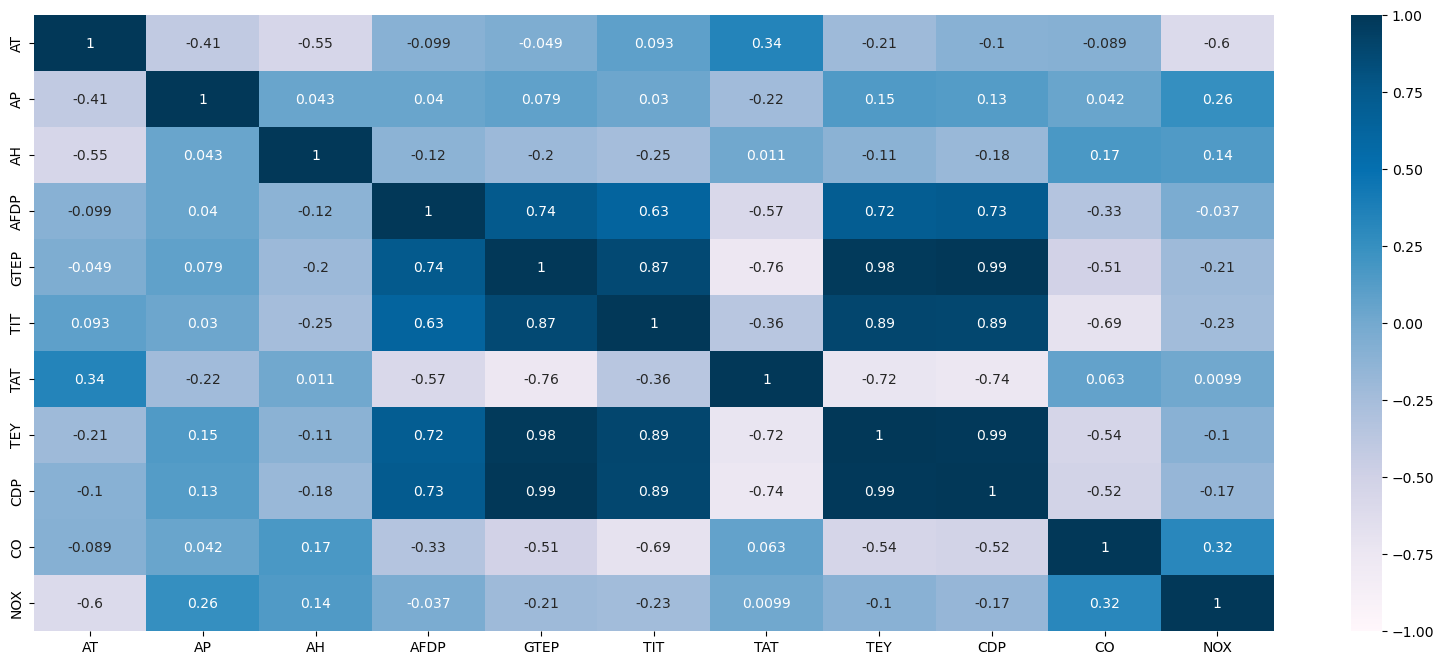

In [8]:
plt.figure(figsize=(20,8))
sns.heatmap(gas.corr(),vmax=1,vmin=-1,annot=True,cmap='PuBu')
plt.show()

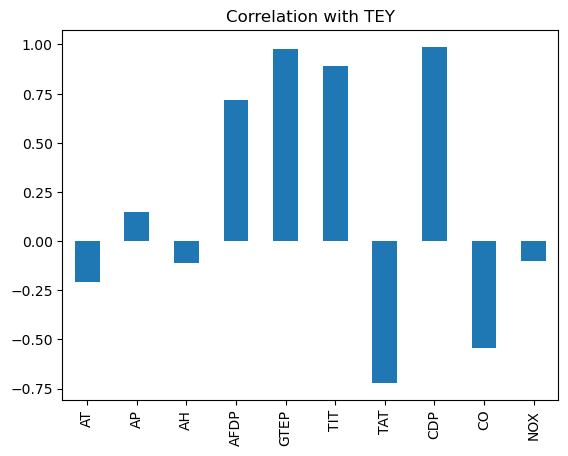

In [9]:
correlations = gas.corrwith(gas.TEY)
correlations = correlations[correlations!=1]
correlations.plot(kind = 'bar')
plt.title('Correlation with TEY')
plt.show()
# Features what are highly corelated with Target: GTEP,TAT,TIT,CDP and CO

<Figure size 2000x2000 with 0 Axes>

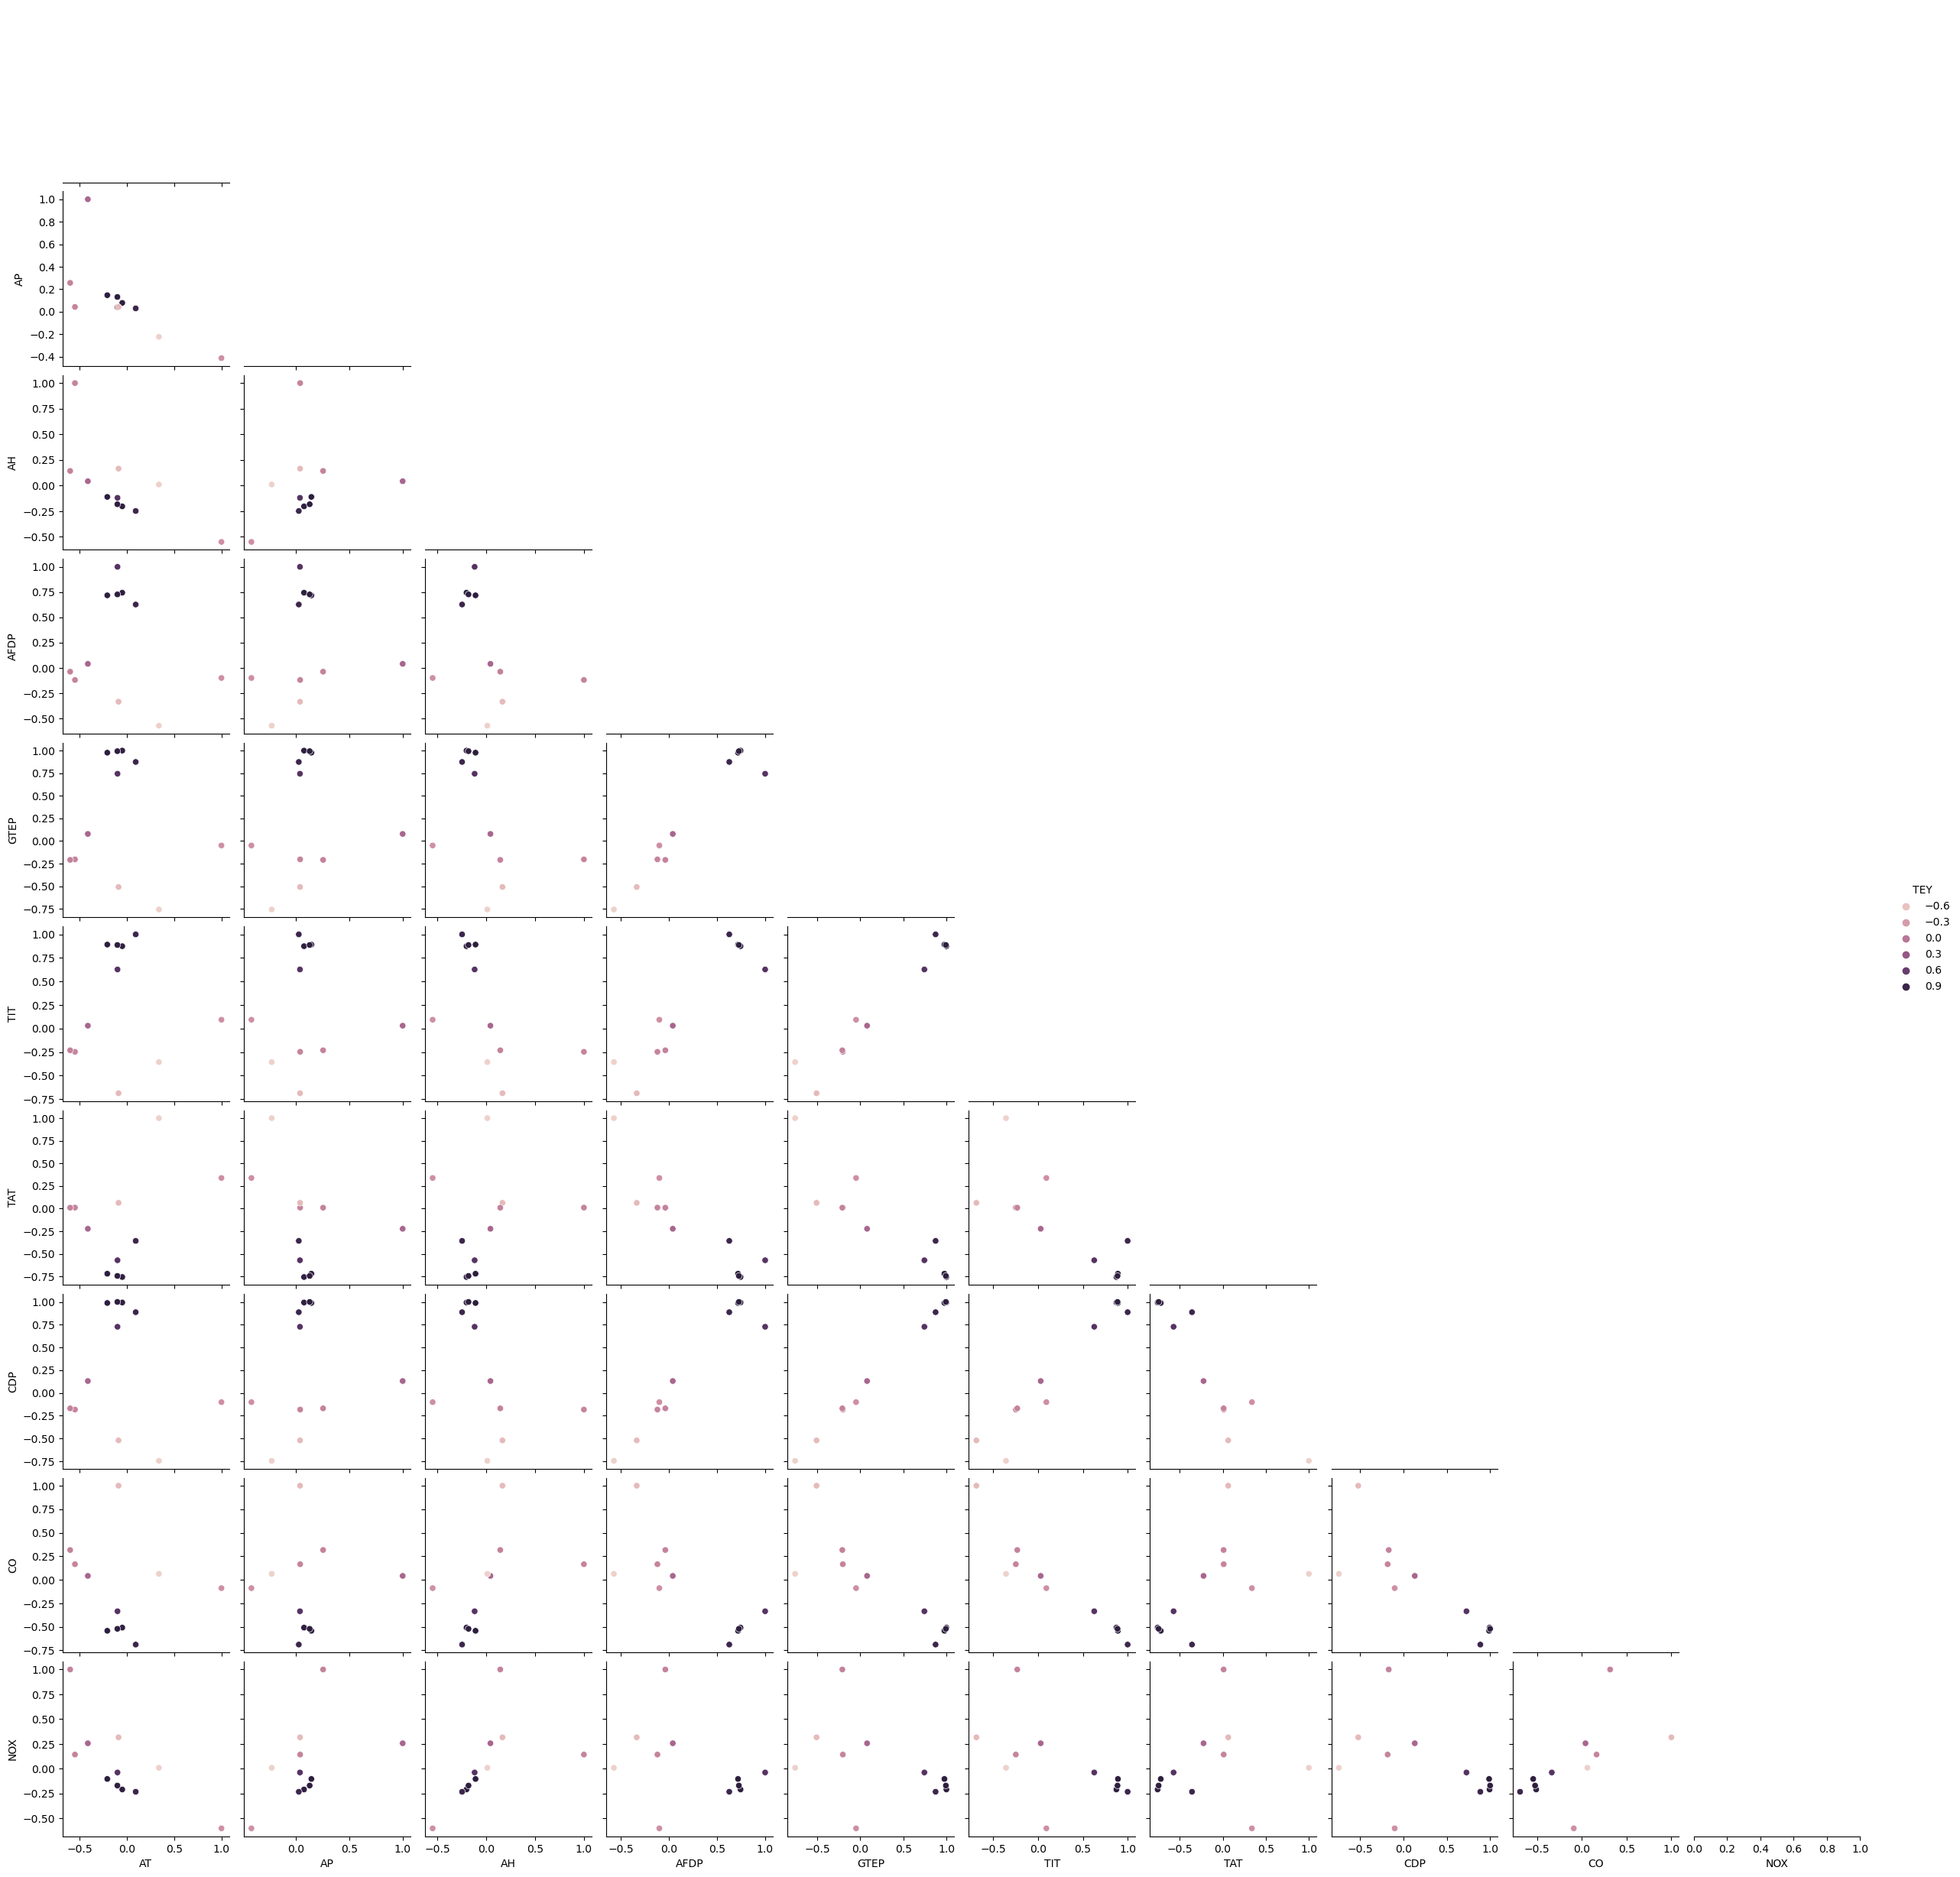

In [10]:
plt.figure(figsize=(20,20))
sns.pairplot(gas.corr(),diag_kind='kde',corner=True,hue='TEY')
plt.show() #multivariate analysis

Histogram of :  AT


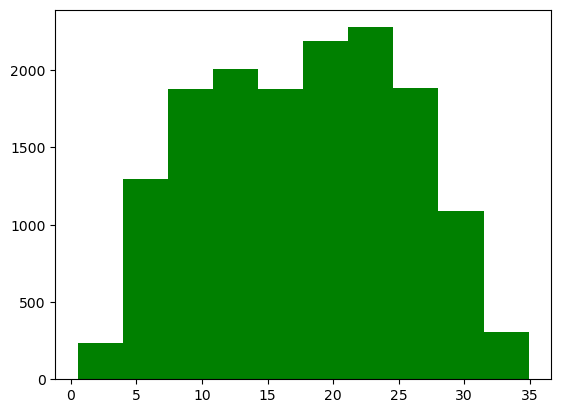

Histogram of :  AP


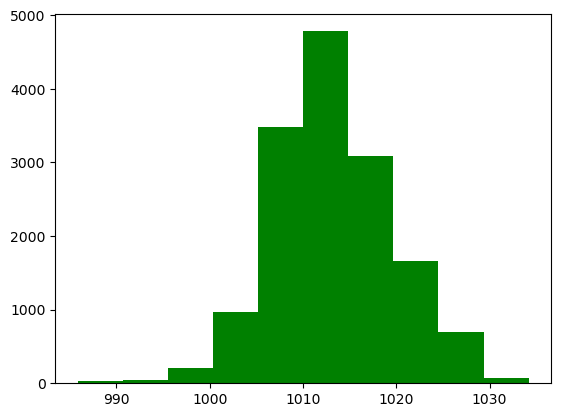

Histogram of :  AH


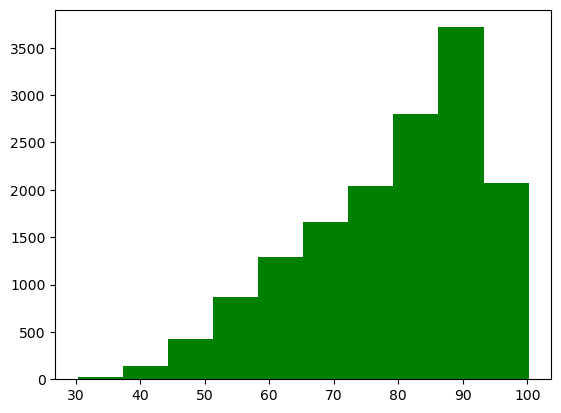

Histogram of :  AFDP


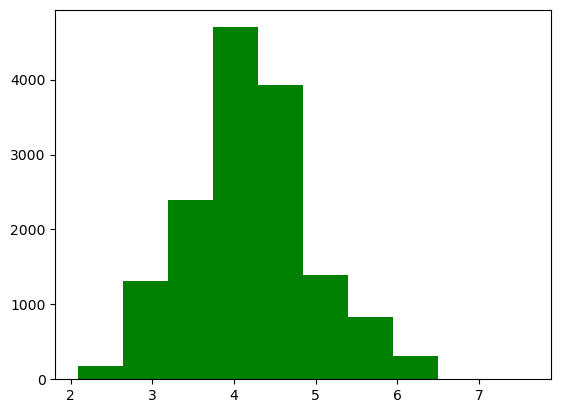

Histogram of :  GTEP


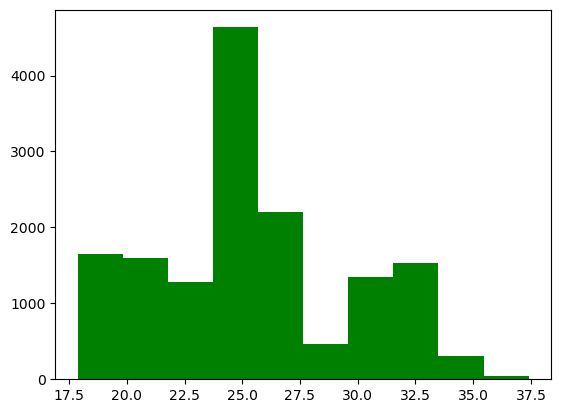

Histogram of :  TIT


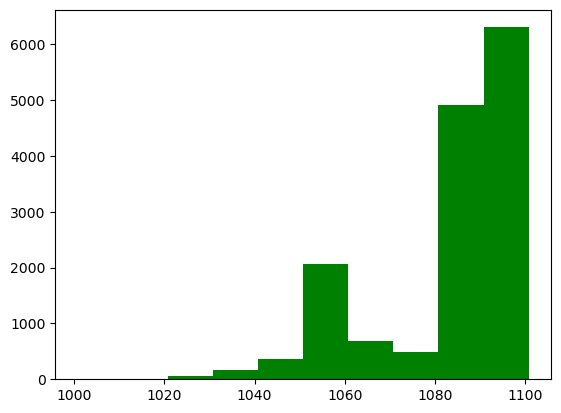

Histogram of :  TAT


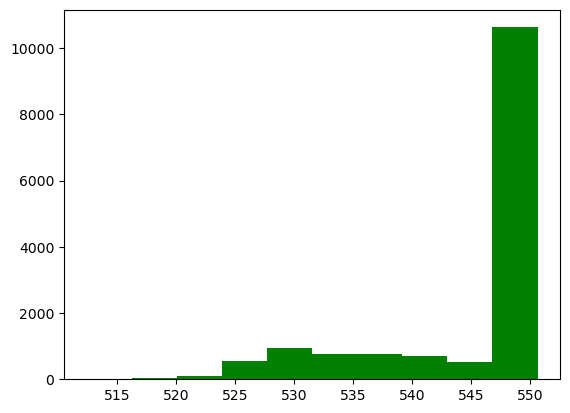

Histogram of :  TEY


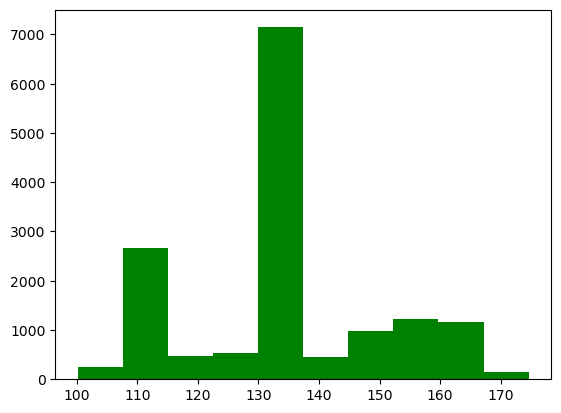

Histogram of :  CDP


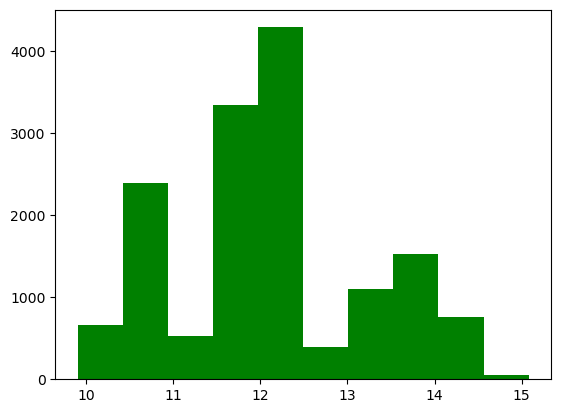

Histogram of :  CO


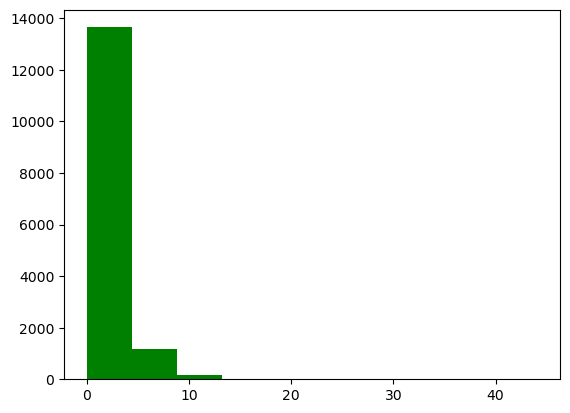

Histogram of :  NOX


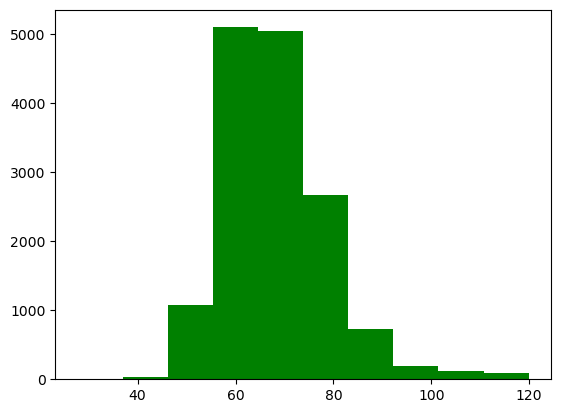

In [11]:
for i in gas.columns:   # Checking data distribution for each features:
    print('Histogram of : ',i)
    plt.hist(gas[i],color='Green')
    plt.show()

Box Plot of :  AT


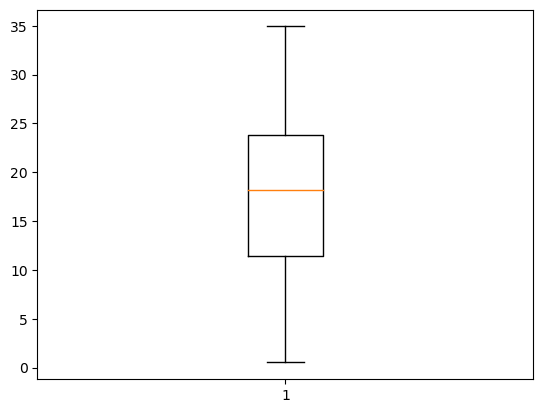

Box Plot of :  AP


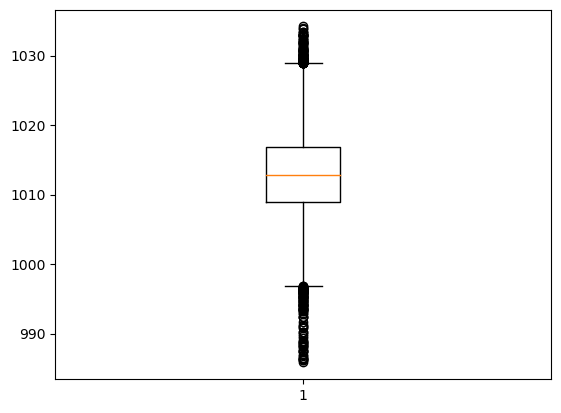

Box Plot of :  AH


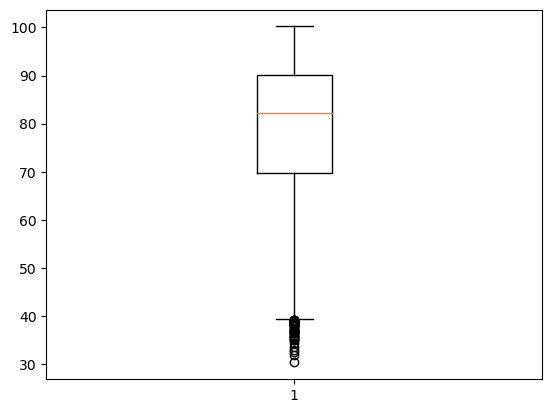

Box Plot of :  AFDP


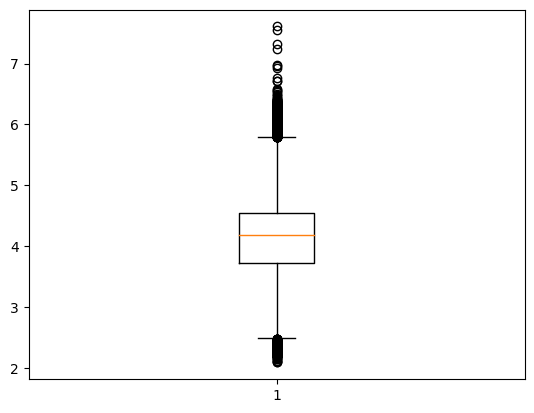

Box Plot of :  GTEP


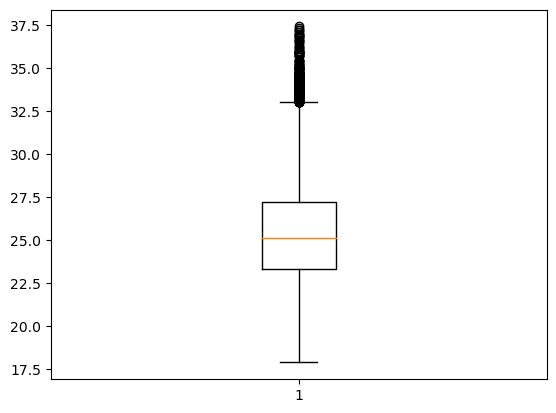

Box Plot of :  TIT


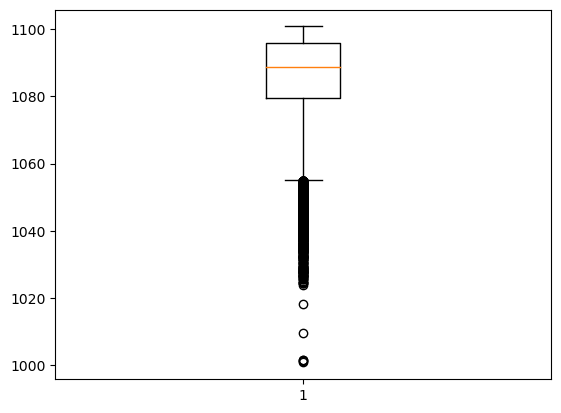

Box Plot of :  TAT


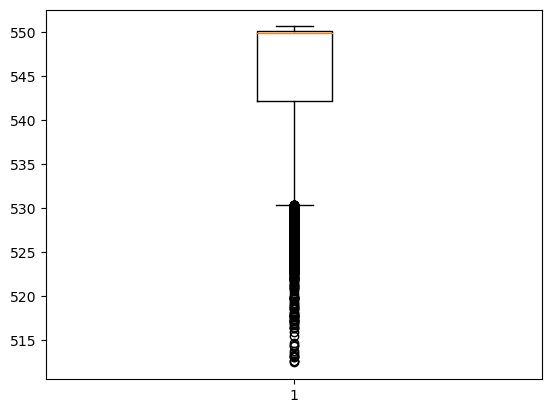

Box Plot of :  TEY


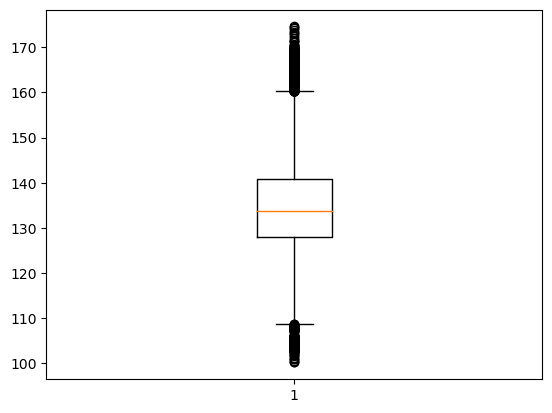

Box Plot of :  CDP


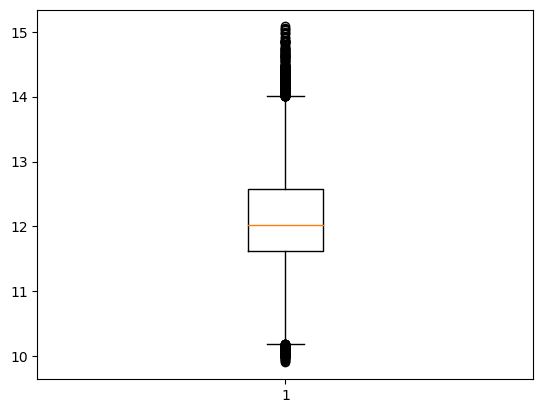

Box Plot of :  CO


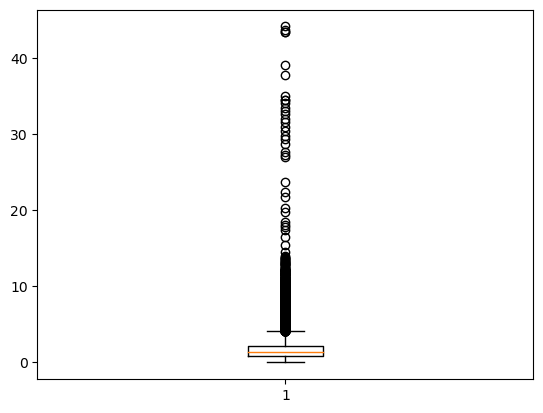

Box Plot of :  NOX


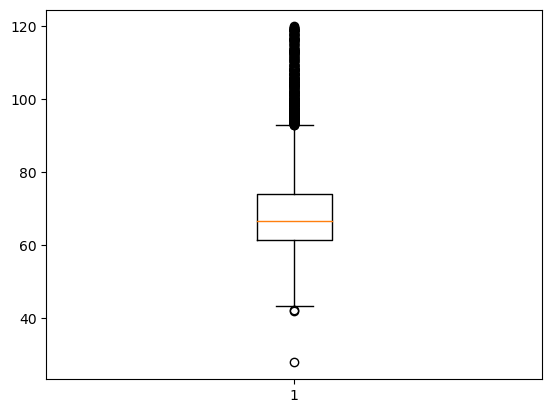

In [12]:
for i in gas.columns:  # Checking for outliers:
    print('Box Plot of : ',i)
    plt.boxplot(gas[i])
    plt.show()

In [13]:
# Let's scale the data using Zscore:
gas_scaled = gas.apply(zscore)
gas_scaled.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591


In [14]:
#Preprocessing:
X = gas_scaled.drop('TEY',axis = 1)
y = gas_scaled['TEY']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=21,test_size=0.25)

### Building LR model:

In [16]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [17]:
y_train_pred = LR.predict(X_train)
print(mean_squared_error(y_train_pred,y_train))
r2_score(y_train_pred,y_train)

0.00204662024441292


0.997946115027154

In [18]:
y_test_pred = LR.predict(X_test)
print(mean_squared_error(y_test_pred,y_test))
r2_score(y_test_pred,y_test)

0.002134990525265633


0.9978666924808728

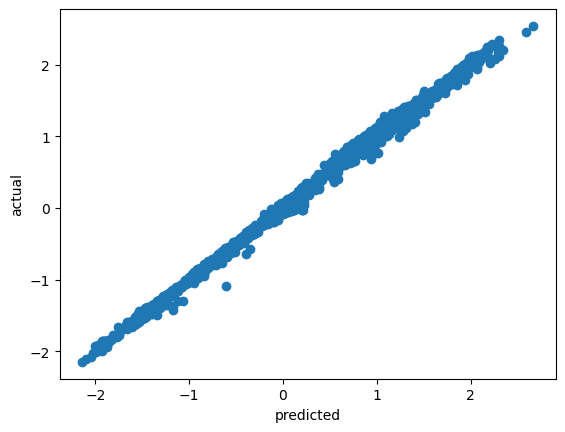

In [19]:
plt.scatter(y_test_pred,y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

### Building ANN model using MLP:

In [20]:
nnm1 = MLPRegressor(hidden_layer_sizes=1000,
                     max_iter=1000,
                     solver='sgd',
                     random_state=2,
                     verbose=True,
                     tol=0.0001,
                     learning_rate='constant'
                    )

In [21]:
nnm1.fit(X_train,y_train)

Iteration 1, loss = 0.16844107
Iteration 2, loss = 0.01095829
Iteration 3, loss = 0.00659701
Iteration 4, loss = 0.00461445
Iteration 5, loss = 0.00355263
Iteration 6, loss = 0.00293476
Iteration 7, loss = 0.00255977
Iteration 8, loss = 0.00231877
Iteration 9, loss = 0.00215532
Iteration 10, loss = 0.00203853
Iteration 11, loss = 0.00195094
Iteration 12, loss = 0.00187870
Iteration 13, loss = 0.00181963
Iteration 14, loss = 0.00176776
Iteration 15, loss = 0.00172304
Iteration 16, loss = 0.00168250
Iteration 17, loss = 0.00164555
Iteration 18, loss = 0.00161108
Iteration 19, loss = 0.00157990
Iteration 20, loss = 0.00155070
Iteration 21, loss = 0.00152347
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(hidden_layer_sizes=1000, max_iter=1000, random_state=2,
             solver='sgd', verbose=True)

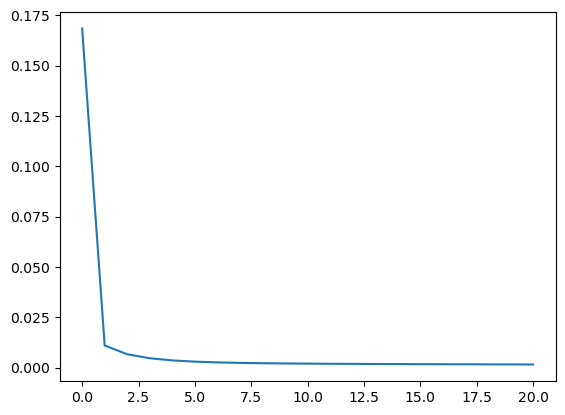

In [22]:
plt.plot(nnm1.loss_curve_)
plt.show()

In [23]:
y_train_pred = nnm1.predict(X_train)
print(mean_squared_error(y_train_pred,y_train))
r2_score(y_train_pred,y_train)

0.0030044280817885637


0.9969805376221546

In [24]:
y_test_pred = nnm1.predict(X_test)
print(mean_squared_error(y_test_pred,y_test))
r2_score(y_test_pred,y_test)

0.003024475807461115


0.9969759532036203

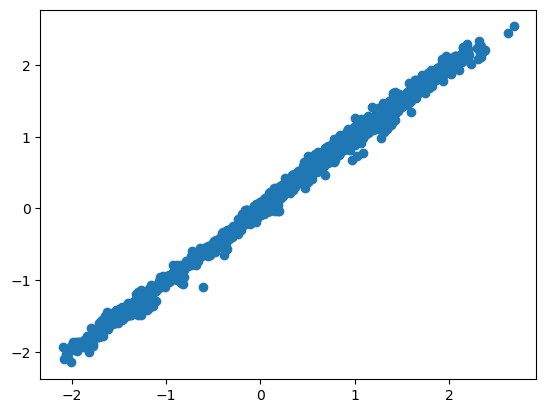

In [25]:
plt.scatter(y_test_pred,y_test)
plt.show()

In [26]:
#Grid Search:

nnm = MLPRegressor(solver='sgd',
                     random_state=2,
                     verbose=True,
                     tol=0.0001,
                     learning_rate='constant'
                    )

hidden_layer_sizes=[100,500,1000,2000]
batch_size=[10,20,40,50]
max_iter=[500,1000,2000,5000]

param_grid=dict(batch_size=batch_size,hidden_layer_sizes=hidden_layer_sizes,max_iter=max_iter)

grid = GridSearchCV(estimator=nnm,param_grid=param_grid,cv=KFold(),verbose=False)
grid_result = grid.fit(X_test,y_test)
grid_result.best_params_

Iteration 1, loss = 0.06222312
Iteration 2, loss = 0.00669331
Iteration 3, loss = 0.00421728
Iteration 4, loss = 0.00342423
Iteration 5, loss = 0.00303193
Iteration 6, loss = 0.00272835
Iteration 7, loss = 0.00251521
Iteration 8, loss = 0.00235417
Iteration 9, loss = 0.00223491
Iteration 10, loss = 0.00213491
Iteration 11, loss = 0.00204624
Iteration 12, loss = 0.00198388
Iteration 13, loss = 0.00191709
Iteration 14, loss = 0.00186572
Iteration 15, loss = 0.00182239
Iteration 16, loss = 0.00177929
Iteration 17, loss = 0.00174657
Iteration 18, loss = 0.00170671
Iteration 19, loss = 0.00167890
Iteration 20, loss = 0.00165781
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.06106876
Iteration 2, loss = 0.00659600
Iteration 3, loss = 0.00423328
Iteration 4, loss = 0.00346043
Iteration 5, loss = 0.00302158
Iteration 6, loss = 0.00272799
Iteration 7, loss = 0.00251186
Iteration 8, loss = 0.00233064
Iteration 9, loss = 0.00220686


Iteration 8, loss = 0.00233064
Iteration 9, loss = 0.00220686
Iteration 10, loss = 0.00211131
Iteration 11, loss = 0.00201965
Iteration 12, loss = 0.00194661
Iteration 13, loss = 0.00188138
Iteration 14, loss = 0.00183268
Iteration 15, loss = 0.00178019
Iteration 16, loss = 0.00174475
Iteration 17, loss = 0.00170208
Iteration 18, loss = 0.00166410
Iteration 19, loss = 0.00163756
Iteration 20, loss = 0.00161410
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.06063579
Iteration 2, loss = 0.00659793
Iteration 3, loss = 0.00424716
Iteration 4, loss = 0.00344647
Iteration 5, loss = 0.00300042
Iteration 6, loss = 0.00271760
Iteration 7, loss = 0.00249927
Iteration 8, loss = 0.00233272
Iteration 9, loss = 0.00221177
Iteration 10, loss = 0.00211540
Iteration 11, loss = 0.00202498
Iteration 12, loss = 0.00196023
Iteration 13, loss = 0.00189677
Iteration 14, loss = 0.00185086
Iteration 15, loss = 0.00180046
Iteration 16, loss = 0.00

Iteration 1, loss = 0.03918179
Iteration 2, loss = 0.00277283
Iteration 3, loss = 0.00196853
Iteration 4, loss = 0.00174629
Iteration 5, loss = 0.00162147
Iteration 6, loss = 0.00152440
Iteration 7, loss = 0.00144024
Iteration 8, loss = 0.00138531
Iteration 9, loss = 0.00133608
Iteration 10, loss = 0.00129636
Iteration 11, loss = 0.00125973
Iteration 12, loss = 0.00122794
Iteration 13, loss = 0.00120581
Iteration 14, loss = 0.00118505
Iteration 15, loss = 0.00116281
Iteration 16, loss = 0.00114571
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.03971093
Iteration 2, loss = 0.00293171
Iteration 3, loss = 0.00208284
Iteration 4, loss = 0.00186459
Iteration 5, loss = 0.00174357
Iteration 6, loss = 0.00163329
Iteration 7, loss = 0.00156225
Iteration 8, loss = 0.00149298
Iteration 9, loss = 0.00144100
Iteration 10, loss = 0.00139296
Iteration 11, loss = 0.00136203
Iteration 12, loss = 0.00132949
Iteration 13, loss = 0.00129832


Iteration 9, loss = 0.00137297
Iteration 10, loss = 0.00132846
Iteration 11, loss = 0.00128448
Iteration 12, loss = 0.00125179
Iteration 13, loss = 0.00122541
Iteration 14, loss = 0.00120606
Iteration 15, loss = 0.00118428
Iteration 16, loss = 0.00116507
Iteration 17, loss = 0.00114389
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.03919772
Iteration 2, loss = 0.00274696
Iteration 3, loss = 0.00208432
Iteration 4, loss = 0.00185118
Iteration 5, loss = 0.00171842
Iteration 6, loss = 0.00160153
Iteration 7, loss = 0.00152320
Iteration 8, loss = 0.00145712
Iteration 9, loss = 0.00140589
Iteration 10, loss = 0.00137096
Iteration 11, loss = 0.00132505
Iteration 12, loss = 0.00129093
Iteration 13, loss = 0.00126815
Iteration 14, loss = 0.00124618
Iteration 15, loss = 0.00122866
Iteration 16, loss = 0.00120856
Iteration 17, loss = 0.00118641
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping

Iteration 1, loss = 0.03686658
Iteration 2, loss = 0.00256887
Iteration 3, loss = 0.00195495
Iteration 4, loss = 0.00172628
Iteration 5, loss = 0.00160094
Iteration 6, loss = 0.00149476
Iteration 7, loss = 0.00141959
Iteration 8, loss = 0.00136417
Iteration 9, loss = 0.00132177
Iteration 10, loss = 0.00128450
Iteration 11, loss = 0.00124652
Iteration 12, loss = 0.00122358
Iteration 13, loss = 0.00120578
Iteration 14, loss = 0.00118415
Iteration 15, loss = 0.00116647
Iteration 16, loss = 0.00115160
Iteration 17, loss = 0.00113594
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.03684249
Iteration 2, loss = 0.00250765
Iteration 3, loss = 0.00192796
Iteration 4, loss = 0.00169682
Iteration 5, loss = 0.00156877
Iteration 6, loss = 0.00146860
Iteration 7, loss = 0.00139293
Iteration 8, loss = 0.00133034
Iteration 9, loss = 0.00129158
Iteration 10, loss = 0.00124802
Iteration 11, loss = 0.00121220
Iteration 12, loss = 0.00118936


Iteration 1, loss = 0.03221129
Iteration 2, loss = 0.00207597
Iteration 3, loss = 0.00162280
Iteration 4, loss = 0.00151469
Iteration 5, loss = 0.00143184
Iteration 6, loss = 0.00136702
Iteration 7, loss = 0.00132033
Iteration 8, loss = 0.00128112
Iteration 9, loss = 0.00124696
Iteration 10, loss = 0.00121630
Iteration 11, loss = 0.00118958
Iteration 12, loss = 0.00116300
Iteration 13, loss = 0.00115181
Iteration 14, loss = 0.00113404
Iteration 15, loss = 0.00111736
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.03285365
Iteration 2, loss = 0.00210885
Iteration 3, loss = 0.00164168
Iteration 4, loss = 0.00149142
Iteration 5, loss = 0.00139299
Iteration 6, loss = 0.00133067
Iteration 7, loss = 0.00129007
Iteration 8, loss = 0.00124917
Iteration 9, loss = 0.00120178
Iteration 10, loss = 0.00118250
Iteration 11, loss = 0.00115992
Iteration 12, loss = 0.00113640
Iteration 13, loss = 0.00111388
Iteration 14, loss = 0.00110168


Iteration 13, loss = 0.00105162
Iteration 14, loss = 0.00103715
Iteration 15, loss = 0.00102072
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.03221129
Iteration 2, loss = 0.00207597
Iteration 3, loss = 0.00162280
Iteration 4, loss = 0.00151469
Iteration 5, loss = 0.00143184
Iteration 6, loss = 0.00136702
Iteration 7, loss = 0.00132033
Iteration 8, loss = 0.00128112
Iteration 9, loss = 0.00124696
Iteration 10, loss = 0.00121630
Iteration 11, loss = 0.00118958
Iteration 12, loss = 0.00116300
Iteration 13, loss = 0.00115181
Iteration 14, loss = 0.00113404
Iteration 15, loss = 0.00111736
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.10803533
Iteration 2, loss = 0.01396988
Iteration 3, loss = 0.00755775
Iteration 4, loss = 0.00538804
Iteration 5, loss = 0.00440825
Iteration 6, loss = 0.00383855
Iteration 7, loss = 0.00346767
Iteration 8, loss = 0.00321087
Itera

Iteration 8, loss = 0.00330952
Iteration 9, loss = 0.00309472
Iteration 10, loss = 0.00292692
Iteration 11, loss = 0.00278271
Iteration 12, loss = 0.00267111
Iteration 13, loss = 0.00256618
Iteration 14, loss = 0.00248060
Iteration 15, loss = 0.00239966
Iteration 16, loss = 0.00231769
Iteration 17, loss = 0.00227361
Iteration 18, loss = 0.00221193
Iteration 19, loss = 0.00216375
Iteration 20, loss = 0.00211488
Iteration 21, loss = 0.00206916
Iteration 22, loss = 0.00203084
Iteration 23, loss = 0.00198761
Iteration 24, loss = 0.00195728
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.10803533
Iteration 2, loss = 0.01396988
Iteration 3, loss = 0.00755775
Iteration 4, loss = 0.00538804
Iteration 5, loss = 0.00440825
Iteration 6, loss = 0.00383855
Iteration 7, loss = 0.00346767
Iteration 8, loss = 0.00321087
Iteration 9, loss = 0.00300460
Iteration 10, loss = 0.00285486
Iteration 11, loss = 0.00270698
Iteration 12, loss = 0.00

Iteration 10, loss = 0.00292692
Iteration 11, loss = 0.00278271
Iteration 12, loss = 0.00267111
Iteration 13, loss = 0.00256618
Iteration 14, loss = 0.00248060
Iteration 15, loss = 0.00239966
Iteration 16, loss = 0.00231769
Iteration 17, loss = 0.00227361
Iteration 18, loss = 0.00221193
Iteration 19, loss = 0.00216375
Iteration 20, loss = 0.00211488
Iteration 21, loss = 0.00206916
Iteration 22, loss = 0.00203084
Iteration 23, loss = 0.00198761
Iteration 24, loss = 0.00195728
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.07062237
Iteration 2, loss = 0.00559527
Iteration 3, loss = 0.00302021
Iteration 4, loss = 0.00228254
Iteration 5, loss = 0.00200205
Iteration 6, loss = 0.00184844
Iteration 7, loss = 0.00175572
Iteration 8, loss = 0.00167959
Iteration 9, loss = 0.00160749
Iteration 10, loss = 0.00156218
Iteration 11, loss = 0.00151056
Iteration 12, loss = 0.00146812
Iteration 13, loss = 0.00143204
Iteration 14, loss = 0.

Iteration 4, loss = 0.00231767
Iteration 5, loss = 0.00205613
Iteration 6, loss = 0.00191046
Iteration 7, loss = 0.00180108
Iteration 8, loss = 0.00172341
Iteration 9, loss = 0.00165191
Iteration 10, loss = 0.00159821
Iteration 11, loss = 0.00154230
Iteration 12, loss = 0.00149205
Iteration 13, loss = 0.00146541
Iteration 14, loss = 0.00142333
Iteration 15, loss = 0.00140293
Iteration 16, loss = 0.00136798
Iteration 17, loss = 0.00134388
Iteration 18, loss = 0.00132481
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.07164476
Iteration 2, loss = 0.00578730
Iteration 3, loss = 0.00310436
Iteration 4, loss = 0.00229652
Iteration 5, loss = 0.00198289
Iteration 6, loss = 0.00182169
Iteration 7, loss = 0.00170910
Iteration 8, loss = 0.00163611
Iteration 9, loss = 0.00156959
Iteration 10, loss = 0.00151791
Iteration 11, loss = 0.00146737
Iteration 12, loss = 0.00142877
Iteration 13, loss = 0.00139545
Iteration 14, loss = 0.001357

Iteration 1, loss = 0.06779670
Iteration 2, loss = 0.00466764
Iteration 3, loss = 0.00274407
Iteration 4, loss = 0.00217940
Iteration 5, loss = 0.00193722
Iteration 6, loss = 0.00178711
Iteration 7, loss = 0.00169006
Iteration 8, loss = 0.00160534
Iteration 9, loss = 0.00154338
Iteration 10, loss = 0.00149226
Iteration 11, loss = 0.00143896
Iteration 12, loss = 0.00140512
Iteration 13, loss = 0.00137188
Iteration 14, loss = 0.00133767
Iteration 15, loss = 0.00130985
Iteration 16, loss = 0.00128925
Iteration 17, loss = 0.00126741
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.06862131
Iteration 2, loss = 0.00445416
Iteration 3, loss = 0.00265844
Iteration 4, loss = 0.00212620
Iteration 5, loss = 0.00189889
Iteration 6, loss = 0.00176356
Iteration 7, loss = 0.00166183
Iteration 8, loss = 0.00158029
Iteration 9, loss = 0.00151603
Iteration 10, loss = 0.00146217
Iteration 11, loss = 0.00141337
Iteration 12, loss = 0.00137377


Iteration 2, loss = 0.00431084
Iteration 3, loss = 0.00257298
Iteration 4, loss = 0.00206579
Iteration 5, loss = 0.00183472
Iteration 6, loss = 0.00171832
Iteration 7, loss = 0.00161950
Iteration 8, loss = 0.00154485
Iteration 9, loss = 0.00148240
Iteration 10, loss = 0.00144030
Iteration 11, loss = 0.00138778
Iteration 12, loss = 0.00134688
Iteration 13, loss = 0.00131553
Iteration 14, loss = 0.00128381
Iteration 15, loss = 0.00125476
Iteration 16, loss = 0.00123361
Iteration 17, loss = 0.00121162
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.06820211
Iteration 2, loss = 0.00419350
Iteration 3, loss = 0.00261474
Iteration 4, loss = 0.00214128
Iteration 5, loss = 0.00192494
Iteration 6, loss = 0.00180741
Iteration 7, loss = 0.00171583
Iteration 8, loss = 0.00164360
Iteration 9, loss = 0.00157619
Iteration 10, loss = 0.00153131
Iteration 11, loss = 0.00148223
Iteration 12, loss = 0.00144510
Iteration 13, loss = 0.00141142

Iteration 1, loss = 0.06012831
Iteration 2, loss = 0.00363277
Iteration 3, loss = 0.00215462
Iteration 4, loss = 0.00172890
Iteration 5, loss = 0.00154870
Iteration 6, loss = 0.00146781
Iteration 7, loss = 0.00140989
Iteration 8, loss = 0.00136374
Iteration 9, loss = 0.00132339
Iteration 10, loss = 0.00129127
Iteration 11, loss = 0.00126786
Iteration 12, loss = 0.00123775
Iteration 13, loss = 0.00121853
Iteration 14, loss = 0.00119515
Iteration 15, loss = 0.00118483
Iteration 16, loss = 0.00116311
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.05948007
Iteration 2, loss = 0.00382012
Iteration 3, loss = 0.00219903
Iteration 4, loss = 0.00170248
Iteration 5, loss = 0.00150307
Iteration 6, loss = 0.00140939
Iteration 7, loss = 0.00134170
Iteration 8, loss = 0.00129790
Iteration 9, loss = 0.00125727
Iteration 10, loss = 0.00122539
Iteration 11, loss = 0.00119835
Iteration 12, loss = 0.00117080
Iteration 13, loss = 0.00115238


Iteration 27, loss = 0.00233669
Iteration 28, loss = 0.00229274
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.18273417
Iteration 2, loss = 0.02778818
Iteration 3, loss = 0.01691537
Iteration 4, loss = 0.01170854
Iteration 5, loss = 0.00881629
Iteration 6, loss = 0.00711061
Iteration 7, loss = 0.00603566
Iteration 8, loss = 0.00527749
Iteration 9, loss = 0.00475455
Iteration 10, loss = 0.00437582
Iteration 11, loss = 0.00406798
Iteration 12, loss = 0.00383317
Iteration 13, loss = 0.00363855
Iteration 14, loss = 0.00348142
Iteration 15, loss = 0.00333679
Iteration 16, loss = 0.00321841
Iteration 17, loss = 0.00312433
Iteration 18, loss = 0.00301904
Iteration 19, loss = 0.00293999
Iteration 20, loss = 0.00286288
Iteration 21, loss = 0.00279171
Iteration 22, loss = 0.00273555
Iteration 23, loss = 0.00267327
Iteration 24, loss = 0.00261454
Iteration 25, loss = 0.00256699
Iteration 26, loss = 0.00252208
Iteration 27, loss = 0.

Iteration 15, loss = 0.00323813
Iteration 16, loss = 0.00312024
Iteration 17, loss = 0.00301704
Iteration 18, loss = 0.00292952
Iteration 19, loss = 0.00285051
Iteration 20, loss = 0.00276125
Iteration 21, loss = 0.00268733
Iteration 22, loss = 0.00262575
Iteration 23, loss = 0.00256552
Iteration 24, loss = 0.00251036
Iteration 25, loss = 0.00245989
Iteration 26, loss = 0.00241324
Iteration 27, loss = 0.00237028
Iteration 28, loss = 0.00232620
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.18016204
Iteration 2, loss = 0.02725250
Iteration 3, loss = 0.01675986
Iteration 4, loss = 0.01168114
Iteration 5, loss = 0.00889468
Iteration 6, loss = 0.00715205
Iteration 7, loss = 0.00605070
Iteration 8, loss = 0.00527794
Iteration 9, loss = 0.00470351
Iteration 10, loss = 0.00431501
Iteration 11, loss = 0.00398050
Iteration 12, loss = 0.00373509
Iteration 13, loss = 0.00353030
Iteration 14, loss = 0.00336059
Iteration 15, loss = 0.

Iteration 7, loss = 0.00239070
Iteration 8, loss = 0.00218549
Iteration 9, loss = 0.00204270
Iteration 10, loss = 0.00194143
Iteration 11, loss = 0.00186815
Iteration 12, loss = 0.00180275
Iteration 13, loss = 0.00175109
Iteration 14, loss = 0.00170120
Iteration 15, loss = 0.00166572
Iteration 16, loss = 0.00162350
Iteration 17, loss = 0.00159051
Iteration 18, loss = 0.00156516
Iteration 19, loss = 0.00152886
Iteration 20, loss = 0.00150528
Iteration 21, loss = 0.00148051
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.13075077
Iteration 2, loss = 0.01187194
Iteration 3, loss = 0.00664263
Iteration 4, loss = 0.00433905
Iteration 5, loss = 0.00324845
Iteration 6, loss = 0.00268140
Iteration 7, loss = 0.00236797
Iteration 8, loss = 0.00218372
Iteration 9, loss = 0.00205419
Iteration 10, loss = 0.00195971
Iteration 11, loss = 0.00188758
Iteration 12, loss = 0.00182548
Iteration 13, loss = 0.00178439
Iteration 14, loss = 0.001

Iteration 14, loss = 0.00172956
Iteration 15, loss = 0.00169940
Iteration 16, loss = 0.00165538
Iteration 17, loss = 0.00162463
Iteration 18, loss = 0.00159490
Iteration 19, loss = 0.00156225
Iteration 20, loss = 0.00153870
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.12925142
Iteration 2, loss = 0.01150581
Iteration 3, loss = 0.00681634
Iteration 4, loss = 0.00453539
Iteration 5, loss = 0.00337383
Iteration 6, loss = 0.00274648
Iteration 7, loss = 0.00237533
Iteration 8, loss = 0.00214623
Iteration 9, loss = 0.00199755
Iteration 10, loss = 0.00188794
Iteration 11, loss = 0.00180598
Iteration 12, loss = 0.00174404
Iteration 13, loss = 0.00169960
Iteration 14, loss = 0.00164804
Iteration 15, loss = 0.00161191
Iteration 16, loss = 0.00157514
Iteration 17, loss = 0.00154624
Iteration 18, loss = 0.00151454
Iteration 19, loss = 0.00149025
Iteration 20, loss = 0.00146315
Iteration 21, loss = 0.00143902
Training loss did not i

Iteration 1, loss = 0.12826795
Iteration 2, loss = 0.00863272
Iteration 3, loss = 0.00501760
Iteration 4, loss = 0.00351422
Iteration 5, loss = 0.00277707
Iteration 6, loss = 0.00240540
Iteration 7, loss = 0.00218354
Iteration 8, loss = 0.00203841
Iteration 9, loss = 0.00193455
Iteration 10, loss = 0.00186177
Iteration 11, loss = 0.00179933
Iteration 12, loss = 0.00174573
Iteration 13, loss = 0.00169997
Iteration 14, loss = 0.00165775
Iteration 15, loss = 0.00162257
Iteration 16, loss = 0.00158653
Iteration 17, loss = 0.00155731
Iteration 18, loss = 0.00153190
Iteration 19, loss = 0.00150554
Iteration 20, loss = 0.00147970
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.12631175
Iteration 2, loss = 0.00921750
Iteration 3, loss = 0.00530870
Iteration 4, loss = 0.00365783
Iteration 5, loss = 0.00286397
Iteration 6, loss = 0.00243829
Iteration 7, loss = 0.00219469
Iteration 8, loss = 0.00203636
Iteration 9, loss = 0.00192719


Iteration 11, loss = 0.00178249
Iteration 12, loss = 0.00172147
Iteration 13, loss = 0.00167293
Iteration 14, loss = 0.00162777
Iteration 15, loss = 0.00158771
Iteration 16, loss = 0.00155780
Iteration 17, loss = 0.00152300
Iteration 18, loss = 0.00149308
Iteration 19, loss = 0.00146432
Iteration 20, loss = 0.00144395
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.12826951
Iteration 2, loss = 0.00879920
Iteration 3, loss = 0.00506687
Iteration 4, loss = 0.00353221
Iteration 5, loss = 0.00278466
Iteration 6, loss = 0.00238168
Iteration 7, loss = 0.00215145
Iteration 8, loss = 0.00200266
Iteration 9, loss = 0.00189354
Iteration 10, loss = 0.00181557
Iteration 11, loss = 0.00175390
Iteration 12, loss = 0.00169388
Iteration 13, loss = 0.00164963
Iteration 14, loss = 0.00160100
Iteration 15, loss = 0.00156165
Iteration 16, loss = 0.00152839
Iteration 17, loss = 0.00149388
Iteration 18, loss = 0.00146663
Iteration 19, loss = 0.

Iteration 6, loss = 0.00194280
Iteration 7, loss = 0.00174984
Iteration 8, loss = 0.00163176
Iteration 9, loss = 0.00154563
Iteration 10, loss = 0.00149151
Iteration 11, loss = 0.00144889
Iteration 12, loss = 0.00141275
Iteration 13, loss = 0.00138766
Iteration 14, loss = 0.00135894
Iteration 15, loss = 0.00134031
Iteration 16, loss = 0.00131833
Iteration 17, loss = 0.00129744
Iteration 18, loss = 0.00128376
Iteration 19, loss = 0.00126905
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.11054908
Iteration 2, loss = 0.00758503
Iteration 3, loss = 0.00447236
Iteration 4, loss = 0.00306077
Iteration 5, loss = 0.00235186
Iteration 6, loss = 0.00196575
Iteration 7, loss = 0.00174025
Iteration 8, loss = 0.00159918
Iteration 9, loss = 0.00150122
Iteration 10, loss = 0.00143651
Iteration 11, loss = 0.00138983
Iteration 12, loss = 0.00134828
Iteration 13, loss = 0.00132045
Iteration 14, loss = 0.00129274
Iteration 15, loss = 0.0012

Iteration 5, loss = 0.00244378
Iteration 6, loss = 0.00206254
Iteration 7, loss = 0.00183823
Iteration 8, loss = 0.00169929
Iteration 9, loss = 0.00160789
Iteration 10, loss = 0.00154388
Iteration 11, loss = 0.00149670
Iteration 12, loss = 0.00146040
Iteration 13, loss = 0.00142872
Iteration 14, loss = 0.00140168
Iteration 15, loss = 0.00138063
Iteration 16, loss = 0.00135777
Iteration 17, loss = 0.00133747
Iteration 18, loss = 0.00132380
Iteration 19, loss = 0.00130671
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.22028581
Iteration 2, loss = 0.03295414
Iteration 3, loss = 0.02061607
Iteration 4, loss = 0.01430281
Iteration 5, loss = 0.01071581
Iteration 6, loss = 0.00850405
Iteration 7, loss = 0.00707204
Iteration 8, loss = 0.00611883
Iteration 9, loss = 0.00541852
Iteration 10, loss = 0.00494664
Iteration 11, loss = 0.00454062
Iteration 12, loss = 0.00424866
Iteration 13, loss = 0.00401328
Iteration 14, loss = 0.00381

Iteration 19, loss = 0.00320257
Iteration 20, loss = 0.00310093
Iteration 21, loss = 0.00301393
Iteration 22, loss = 0.00294086
Iteration 23, loss = 0.00286848
Iteration 24, loss = 0.00280171
Iteration 25, loss = 0.00274117
Iteration 26, loss = 0.00268555
Iteration 27, loss = 0.00263375
Iteration 28, loss = 0.00258574
Iteration 29, loss = 0.00253820
Iteration 30, loss = 0.00249203
Iteration 31, loss = 0.00245707
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.21541490
Iteration 2, loss = 0.03230263
Iteration 3, loss = 0.02066803
Iteration 4, loss = 0.01474097
Iteration 5, loss = 0.01128381
Iteration 6, loss = 0.00905013
Iteration 7, loss = 0.00757886
Iteration 8, loss = 0.00652191
Iteration 9, loss = 0.00573747
Iteration 10, loss = 0.00519720
Iteration 11, loss = 0.00474085
Iteration 12, loss = 0.00440073
Iteration 13, loss = 0.00411630
Iteration 14, loss = 0.00388934
Iteration 15, loss = 0.00369164
Iteration 16, loss = 0.

Iteration 26, loss = 0.00269886
Iteration 27, loss = 0.00264624
Iteration 28, loss = 0.00260600
Iteration 29, loss = 0.00255654
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.21964676
Iteration 2, loss = 0.03254409
Iteration 3, loss = 0.02032715
Iteration 4, loss = 0.01417842
Iteration 5, loss = 0.01066687
Iteration 6, loss = 0.00847962
Iteration 7, loss = 0.00707492
Iteration 8, loss = 0.00613215
Iteration 9, loss = 0.00544742
Iteration 10, loss = 0.00497242
Iteration 11, loss = 0.00457620
Iteration 12, loss = 0.00428219
Iteration 13, loss = 0.00404352
Iteration 14, loss = 0.00384454
Iteration 15, loss = 0.00367855
Iteration 16, loss = 0.00353840
Iteration 17, loss = 0.00341443
Iteration 18, loss = 0.00330424
Iteration 19, loss = 0.00321307
Iteration 20, loss = 0.00310644
Iteration 21, loss = 0.00302381
Iteration 22, loss = 0.00295300
Iteration 23, loss = 0.00287770
Iteration 24, loss = 0.00281583
Iteration 25, loss = 0.

Iteration 4, loss = 0.00581052
Iteration 5, loss = 0.00424037
Iteration 6, loss = 0.00332253
Iteration 7, loss = 0.00279789
Iteration 8, loss = 0.00246922
Iteration 9, loss = 0.00225367
Iteration 10, loss = 0.00210894
Iteration 11, loss = 0.00200027
Iteration 12, loss = 0.00191844
Iteration 13, loss = 0.00185798
Iteration 14, loss = 0.00180428
Iteration 15, loss = 0.00175905
Iteration 16, loss = 0.00171793
Iteration 17, loss = 0.00168296
Iteration 18, loss = 0.00166024
Iteration 19, loss = 0.00162467
Iteration 20, loss = 0.00159905
Iteration 21, loss = 0.00157492
Iteration 22, loss = 0.00155352
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.15906258
Iteration 2, loss = 0.01452969
Iteration 3, loss = 0.00874540
Iteration 4, loss = 0.00588660
Iteration 5, loss = 0.00431510
Iteration 6, loss = 0.00339105
Iteration 7, loss = 0.00285982
Iteration 8, loss = 0.00252882
Iteration 9, loss = 0.00230778
Iteration 10, loss = 0.002152

Iteration 17, loss = 0.00168296
Iteration 18, loss = 0.00166024
Iteration 19, loss = 0.00162467
Iteration 20, loss = 0.00159905
Iteration 21, loss = 0.00157492
Iteration 22, loss = 0.00155352
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.15906258
Iteration 2, loss = 0.01452969
Iteration 3, loss = 0.00874540
Iteration 4, loss = 0.00588660
Iteration 5, loss = 0.00431510
Iteration 6, loss = 0.00339105
Iteration 7, loss = 0.00285982
Iteration 8, loss = 0.00252882
Iteration 9, loss = 0.00230778
Iteration 10, loss = 0.00215232
Iteration 11, loss = 0.00204397
Iteration 12, loss = 0.00195986
Iteration 13, loss = 0.00189314
Iteration 14, loss = 0.00183461
Iteration 15, loss = 0.00178718
Iteration 16, loss = 0.00174310
Iteration 17, loss = 0.00170601
Iteration 18, loss = 0.00167622
Iteration 19, loss = 0.00163827
Iteration 20, loss = 0.00161178
Iteration 21, loss = 0.00158512
Iteration 22, loss = 0.00156103
Training loss did not i

Iteration 10, loss = 0.00197783
Iteration 11, loss = 0.00189902
Iteration 12, loss = 0.00182648
Iteration 13, loss = 0.00177363
Iteration 14, loss = 0.00171913
Iteration 15, loss = 0.00167722
Iteration 16, loss = 0.00164128
Iteration 17, loss = 0.00160323
Iteration 18, loss = 0.00157433
Iteration 19, loss = 0.00154357
Iteration 20, loss = 0.00151520
Iteration 21, loss = 0.00148943
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.15571679
Iteration 2, loss = 0.01085828
Iteration 3, loss = 0.00642051
Iteration 4, loss = 0.00444506
Iteration 5, loss = 0.00341313
Iteration 6, loss = 0.00284133
Iteration 7, loss = 0.00249677
Iteration 8, loss = 0.00227789
Iteration 9, loss = 0.00212540
Iteration 10, loss = 0.00201946
Iteration 11, loss = 0.00193479
Iteration 12, loss = 0.00186695
Iteration 13, loss = 0.00181030
Iteration 14, loss = 0.00175749
Iteration 15, loss = 0.00171524
Iteration 16, loss = 0.00167958
Iteration 17, loss = 0.

Iteration 12, loss = 0.00186695
Iteration 13, loss = 0.00181030
Iteration 14, loss = 0.00175749
Iteration 15, loss = 0.00171524
Iteration 16, loss = 0.00167958
Iteration 17, loss = 0.00164206
Iteration 18, loss = 0.00161011
Iteration 19, loss = 0.00157999
Iteration 20, loss = 0.00155304
Iteration 21, loss = 0.00152672
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.15588187
Iteration 2, loss = 0.01062771
Iteration 3, loss = 0.00634381
Iteration 4, loss = 0.00442102
Iteration 5, loss = 0.00337197
Iteration 6, loss = 0.00279747
Iteration 7, loss = 0.00243785
Iteration 8, loss = 0.00220542
Iteration 9, loss = 0.00204922
Iteration 10, loss = 0.00194215
Iteration 11, loss = 0.00185233
Iteration 12, loss = 0.00178438
Iteration 13, loss = 0.00173146
Iteration 14, loss = 0.00168201
Iteration 15, loss = 0.00163920
Iteration 16, loss = 0.00160554
Iteration 17, loss = 0.00156960
Iteration 18, loss = 0.00153945
Iteration 19, loss = 0.

Iteration 18, loss = 0.00127837
Iteration 19, loss = 0.00126100
Iteration 20, loss = 0.00124073
Iteration 21, loss = 0.00122339
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.13489428
Iteration 2, loss = 0.00956533
Iteration 3, loss = 0.00585131
Iteration 4, loss = 0.00405258
Iteration 5, loss = 0.00304509
Iteration 6, loss = 0.00249025
Iteration 7, loss = 0.00214549
Iteration 8, loss = 0.00192376
Iteration 9, loss = 0.00177698
Iteration 10, loss = 0.00167634
Iteration 11, loss = 0.00160344
Iteration 12, loss = 0.00155029
Iteration 13, loss = 0.00150817
Iteration 14, loss = 0.00147394
Iteration 15, loss = 0.00144695
Iteration 16, loss = 0.00142169
Iteration 17, loss = 0.00139898
Iteration 18, loss = 0.00138335
Iteration 19, loss = 0.00136473
Iteration 20, loss = 0.00134874
Iteration 21, loss = 0.00132953
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.1364416

Iteration 2, loss = 0.00178512
Iteration 3, loss = 0.00150686
Iteration 4, loss = 0.00139961
Iteration 5, loss = 0.00131312
Iteration 6, loss = 0.00126638
Iteration 7, loss = 0.00121913
Iteration 8, loss = 0.00117602
Iteration 9, loss = 0.00114947
Iteration 10, loss = 0.00111775
Iteration 11, loss = 0.00110567
Iteration 12, loss = 0.00107988
Iteration 13, loss = 0.00106760
Iteration 14, loss = 0.00105485
Iteration 15, loss = 0.00104155
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


{'batch_size': 10, 'hidden_layer_sizes': 2000, 'max_iter': 500}

In [32]:
# Running Grid Search again:

nnm = MLPRegressor(solver='sgd',
                     random_state=2,
                     verbose=True,
                     tol=0.0001,
                     learning_rate='constant'
                    )

hidden_layer_sizes=[2000,4000,10000,5000]
batch_size=[15,20,25,30]
max_iter=[100,250,350,500,750,1000]

param_grid=dict(batch_size=batch_size,hidden_layer_sizes=hidden_layer_sizes,max_iter=max_iter)

grid = GridSearchCV(estimator=nnm,param_grid=param_grid,cv=KFold(),verbose=False)
grid_result = grid.fit(X_test,y_test)
grid_result.best_params_

Iteration 1, loss = 0.04674379
Iteration 2, loss = 0.00286592
Iteration 3, loss = 0.00187129
Iteration 4, loss = 0.00160407
Iteration 5, loss = 0.00148098
Iteration 6, loss = 0.00140864
Iteration 7, loss = 0.00136457
Iteration 8, loss = 0.00131439
Iteration 9, loss = 0.00126829
Iteration 10, loss = 0.00124550
Iteration 11, loss = 0.00121707
Iteration 12, loss = 0.00119165
Iteration 13, loss = 0.00116964
Iteration 14, loss = 0.00114780
Iteration 15, loss = 0.00113632
Iteration 16, loss = 0.00111478
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.04714461
Iteration 2, loss = 0.00278921
Iteration 3, loss = 0.00182062
Iteration 4, loss = 0.00156295
Iteration 5, loss = 0.00144254
Iteration 6, loss = 0.00137865
Iteration 7, loss = 0.00132768
Iteration 8, loss = 0.00127870
Iteration 9, loss = 0.00123657
Iteration 10, loss = 0.00120433
Iteration 11, loss = 0.00117619
Iteration 12, loss = 0.00114997
Iteration 13, loss = 0.00112824


Iteration 1, loss = 0.04630358
Iteration 2, loss = 0.00286439
Iteration 3, loss = 0.00186472
Iteration 4, loss = 0.00162310
Iteration 5, loss = 0.00151369
Iteration 6, loss = 0.00144597
Iteration 7, loss = 0.00139265
Iteration 8, loss = 0.00134733
Iteration 9, loss = 0.00131394
Iteration 10, loss = 0.00127791
Iteration 11, loss = 0.00124759
Iteration 12, loss = 0.00122116
Iteration 13, loss = 0.00120364
Iteration 14, loss = 0.00118360
Iteration 15, loss = 0.00116606
Iteration 16, loss = 0.00114826
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.04674379
Iteration 2, loss = 0.00286592
Iteration 3, loss = 0.00187129
Iteration 4, loss = 0.00160407
Iteration 5, loss = 0.00148098
Iteration 6, loss = 0.00140864
Iteration 7, loss = 0.00136457
Iteration 8, loss = 0.00131439
Iteration 9, loss = 0.00126829
Iteration 10, loss = 0.00124550
Iteration 11, loss = 0.00121707
Iteration 12, loss = 0.00119165
Iteration 13, loss = 0.00116964


Iteration 1, loss = 0.04583629
Iteration 2, loss = 0.00281717
Iteration 3, loss = 0.00177477
Iteration 4, loss = 0.00150973
Iteration 5, loss = 0.00139222
Iteration 6, loss = 0.00133120
Iteration 7, loss = 0.00127408
Iteration 8, loss = 0.00123716
Iteration 9, loss = 0.00119803
Iteration 10, loss = 0.00116769
Iteration 11, loss = 0.00114297
Iteration 12, loss = 0.00111723
Iteration 13, loss = 0.00110081
Iteration 14, loss = 0.00108226
Iteration 15, loss = 0.00106403
Iteration 16, loss = 0.00104834
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.04630358
Iteration 2, loss = 0.00286439
Iteration 3, loss = 0.00186472
Iteration 4, loss = 0.00162310
Iteration 5, loss = 0.00151369
Iteration 6, loss = 0.00144597
Iteration 7, loss = 0.00139265
Iteration 8, loss = 0.00134733
Iteration 9, loss = 0.00131394
Iteration 10, loss = 0.00127791
Iteration 11, loss = 0.00124759
Iteration 12, loss = 0.00122116
Iteration 13, loss = 0.00120364


Iteration 1, loss = 0.04909032
Iteration 2, loss = 0.00309213
Iteration 3, loss = 0.00189650
Iteration 4, loss = 0.00162892
Iteration 5, loss = 0.00151809
Iteration 6, loss = 0.00143922
Iteration 7, loss = 0.00138602
Iteration 8, loss = 0.00133180
Iteration 9, loss = 0.00128457
Iteration 10, loss = 0.00125258
Iteration 11, loss = 0.00121402
Iteration 12, loss = 0.00119080
Iteration 13, loss = 0.00116538
Iteration 14, loss = 0.00114151
Iteration 15, loss = 0.00112124
Iteration 16, loss = 0.00110728
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.04816211
Iteration 2, loss = 0.00314969
Iteration 3, loss = 0.00187436
Iteration 4, loss = 0.00155427
Iteration 5, loss = 0.00143491
Iteration 6, loss = 0.00136134
Iteration 7, loss = 0.00130861
Iteration 8, loss = 0.00125397
Iteration 9, loss = 0.00122070
Iteration 10, loss = 0.00118416
Iteration 11, loss = 0.00115260
Iteration 12, loss = 0.00112349
Iteration 13, loss = 0.00110423


Iteration 1, loss = 0.04980245
Iteration 2, loss = 0.00314544
Iteration 3, loss = 0.00191130
Iteration 4, loss = 0.00162111
Iteration 5, loss = 0.00150445
Iteration 6, loss = 0.00142138
Iteration 7, loss = 0.00136510
Iteration 8, loss = 0.00130554
Iteration 9, loss = 0.00125709
Iteration 10, loss = 0.00122451
Iteration 11, loss = 0.00118406
Iteration 12, loss = 0.00115737
Iteration 13, loss = 0.00112993
Iteration 14, loss = 0.00110683
Iteration 15, loss = 0.00108283
Iteration 16, loss = 0.00107179
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.04909032
Iteration 2, loss = 0.00309213
Iteration 3, loss = 0.00189650
Iteration 4, loss = 0.00162892
Iteration 5, loss = 0.00151809
Iteration 6, loss = 0.00143922
Iteration 7, loss = 0.00138602
Iteration 8, loss = 0.00133180
Iteration 9, loss = 0.00128457
Iteration 10, loss = 0.00125258
Iteration 11, loss = 0.00121402
Iteration 12, loss = 0.00119080
Iteration 13, loss = 0.00116538


Iteration 2, loss = 0.00291180
Iteration 3, loss = 0.00180501
Iteration 4, loss = 0.00156968
Iteration 5, loss = 0.00146482
Iteration 6, loss = 0.00140297
Iteration 7, loss = 0.00135037
Iteration 8, loss = 0.00130627
Iteration 9, loss = 0.00126128
Iteration 10, loss = 0.00123515
Iteration 11, loss = 0.00120146
Iteration 12, loss = 0.00117896
Iteration 13, loss = 0.00115589
Iteration 14, loss = 0.00113234
Iteration 15, loss = 0.00111804
Iteration 16, loss = 0.00109971
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.04440341
Iteration 2, loss = 0.00293115
Iteration 3, loss = 0.00180081
Iteration 4, loss = 0.00155072
Iteration 5, loss = 0.00144250
Iteration 6, loss = 0.00137706
Iteration 7, loss = 0.00132163
Iteration 8, loss = 0.00127152
Iteration 9, loss = 0.00122794
Iteration 10, loss = 0.00119582
Iteration 11, loss = 0.00116275
Iteration 12, loss = 0.00114248
Iteration 13, loss = 0.00111525
Iteration 14, loss = 0.00109293

Iteration 4, loss = 0.00160307
Iteration 5, loss = 0.00150401
Iteration 6, loss = 0.00143791
Iteration 7, loss = 0.00138360
Iteration 8, loss = 0.00133790
Iteration 9, loss = 0.00130258
Iteration 10, loss = 0.00127126
Iteration 11, loss = 0.00123526
Iteration 12, loss = 0.00121280
Iteration 13, loss = 0.00118631
Iteration 14, loss = 0.00116603
Iteration 15, loss = 0.00114650
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.04442817
Iteration 2, loss = 0.00291180
Iteration 3, loss = 0.00180501
Iteration 4, loss = 0.00156968
Iteration 5, loss = 0.00146482
Iteration 6, loss = 0.00140297
Iteration 7, loss = 0.00135037
Iteration 8, loss = 0.00130627
Iteration 9, loss = 0.00126128
Iteration 10, loss = 0.00123515
Iteration 11, loss = 0.00120146
Iteration 12, loss = 0.00117896
Iteration 13, loss = 0.00115589
Iteration 14, loss = 0.00113234
Iteration 15, loss = 0.00111804
Iteration 16, loss = 0.00109971
Training loss did not improve

Iteration 4, loss = 0.00146867
Iteration 5, loss = 0.00134681
Iteration 6, loss = 0.00128375
Iteration 7, loss = 0.00123787
Iteration 8, loss = 0.00119984
Iteration 9, loss = 0.00116421
Iteration 10, loss = 0.00113913
Iteration 11, loss = 0.00111560
Iteration 12, loss = 0.00108701
Iteration 13, loss = 0.00107318
Iteration 14, loss = 0.00105356
Iteration 15, loss = 0.00103910
Iteration 16, loss = 0.00102354
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.04568818
Iteration 2, loss = 0.00293041
Iteration 3, loss = 0.00182006
Iteration 4, loss = 0.00157454
Iteration 5, loss = 0.00146668
Iteration 6, loss = 0.00139919
Iteration 7, loss = 0.00135347
Iteration 8, loss = 0.00131336
Iteration 9, loss = 0.00126794
Iteration 10, loss = 0.00123942
Iteration 11, loss = 0.00121583
Iteration 12, loss = 0.00118673
Iteration 13, loss = 0.00117118
Iteration 14, loss = 0.00114907
Iteration 15, loss = 0.00113465
Iteration 16, loss = 0.001117

Iteration 1, loss = 0.04549471
Iteration 2, loss = 0.00298928
Iteration 3, loss = 0.00178177
Iteration 4, loss = 0.00153193
Iteration 5, loss = 0.00142620
Iteration 6, loss = 0.00136535
Iteration 7, loss = 0.00131170
Iteration 8, loss = 0.00127262
Iteration 9, loss = 0.00123556
Iteration 10, loss = 0.00120990
Iteration 11, loss = 0.00118119
Iteration 12, loss = 0.00115771
Iteration 13, loss = 0.00113920
Iteration 14, loss = 0.00112265
Iteration 15, loss = 0.00110714
Iteration 16, loss = 0.00108967
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.04559159
Iteration 2, loss = 0.00309914
Iteration 3, loss = 0.00177271
Iteration 4, loss = 0.00146867
Iteration 5, loss = 0.00134681
Iteration 6, loss = 0.00128375
Iteration 7, loss = 0.00123787
Iteration 8, loss = 0.00119984
Iteration 9, loss = 0.00116421
Iteration 10, loss = 0.00113913
Iteration 11, loss = 0.00111560
Iteration 12, loss = 0.00108701
Iteration 13, loss = 0.00107318


Iteration 1, loss = 0.06070278
Iteration 2, loss = 0.00377966
Iteration 3, loss = 0.00220511
Iteration 4, loss = 0.00173893
Iteration 5, loss = 0.00155083
Iteration 6, loss = 0.00145971
Iteration 7, loss = 0.00139622
Iteration 8, loss = 0.00134400
Iteration 9, loss = 0.00130078
Iteration 10, loss = 0.00126603
Iteration 11, loss = 0.00123600
Iteration 12, loss = 0.00120746
Iteration 13, loss = 0.00118703
Iteration 14, loss = 0.00115800
Iteration 15, loss = 0.00114720
Iteration 16, loss = 0.00112308
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.06012831
Iteration 2, loss = 0.00363277
Iteration 3, loss = 0.00215462
Iteration 4, loss = 0.00172890
Iteration 5, loss = 0.00154870
Iteration 6, loss = 0.00146781
Iteration 7, loss = 0.00140989
Iteration 8, loss = 0.00136374
Iteration 9, loss = 0.00132339
Iteration 10, loss = 0.00129127
Iteration 11, loss = 0.00126786
Iteration 12, loss = 0.00123775
Iteration 13, loss = 0.00121853


Iteration 1, loss = 0.06030773
Iteration 2, loss = 0.00382868
Iteration 3, loss = 0.00224948
Iteration 4, loss = 0.00177848
Iteration 5, loss = 0.00158805
Iteration 6, loss = 0.00148973
Iteration 7, loss = 0.00143216
Iteration 8, loss = 0.00137673
Iteration 9, loss = 0.00133259
Iteration 10, loss = 0.00130526
Iteration 11, loss = 0.00127475
Iteration 12, loss = 0.00124767
Iteration 13, loss = 0.00122611
Iteration 14, loss = 0.00119822
Iteration 15, loss = 0.00118671
Iteration 16, loss = 0.00116295
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.06070278
Iteration 2, loss = 0.00377966
Iteration 3, loss = 0.00220511
Iteration 4, loss = 0.00173893
Iteration 5, loss = 0.00155083
Iteration 6, loss = 0.00145971
Iteration 7, loss = 0.00139622
Iteration 8, loss = 0.00134400
Iteration 9, loss = 0.00130078
Iteration 10, loss = 0.00126603
Iteration 11, loss = 0.00123600
Iteration 12, loss = 0.00120746
Iteration 13, loss = 0.00118703


Iteration 15, loss = 0.00111854
Iteration 16, loss = 0.00110106
Iteration 17, loss = 0.00108253
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.06334737
Iteration 2, loss = 0.00448208
Iteration 3, loss = 0.00245865
Iteration 4, loss = 0.00187172
Iteration 5, loss = 0.00166487
Iteration 6, loss = 0.00156629
Iteration 7, loss = 0.00149956
Iteration 8, loss = 0.00145118
Iteration 9, loss = 0.00140937
Iteration 10, loss = 0.00136550
Iteration 11, loss = 0.00132913
Iteration 12, loss = 0.00129875
Iteration 13, loss = 0.00127005
Iteration 14, loss = 0.00124603
Iteration 15, loss = 0.00122887
Iteration 16, loss = 0.00120282
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.06339690
Iteration 2, loss = 0.00437576
Iteration 3, loss = 0.00238750
Iteration 4, loss = 0.00182859
Iteration 5, loss = 0.00162887
Iteration 6, loss = 0.00152481
Iteration 7, loss = 0.00145560
Iter

Iteration 4, loss = 0.00180837
Iteration 5, loss = 0.00162221
Iteration 6, loss = 0.00152419
Iteration 7, loss = 0.00146360
Iteration 8, loss = 0.00140797
Iteration 9, loss = 0.00136037
Iteration 10, loss = 0.00132715
Iteration 11, loss = 0.00128573
Iteration 12, loss = 0.00125938
Iteration 13, loss = 0.00123073
Iteration 14, loss = 0.00120491
Iteration 15, loss = 0.00118256
Iteration 16, loss = 0.00116523
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.06235081
Iteration 2, loss = 0.00432335
Iteration 3, loss = 0.00237560
Iteration 4, loss = 0.00177388
Iteration 5, loss = 0.00154924
Iteration 6, loss = 0.00144496
Iteration 7, loss = 0.00138306
Iteration 8, loss = 0.00132541
Iteration 9, loss = 0.00129046
Iteration 10, loss = 0.00125321
Iteration 11, loss = 0.00122121
Iteration 12, loss = 0.00118968
Iteration 13, loss = 0.00116595
Iteration 14, loss = 0.00114072
Iteration 15, loss = 0.00111854
Iteration 16, loss = 0.001101

Iteration 13, loss = 0.00121367
Iteration 14, loss = 0.00118946
Iteration 15, loss = 0.00117428
Iteration 16, loss = 0.00115504
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.05689612
Iteration 2, loss = 0.00407332
Iteration 3, loss = 0.00220598
Iteration 4, loss = 0.00171995
Iteration 5, loss = 0.00154117
Iteration 6, loss = 0.00145329
Iteration 7, loss = 0.00139221
Iteration 8, loss = 0.00134084
Iteration 9, loss = 0.00129639
Iteration 10, loss = 0.00126156
Iteration 11, loss = 0.00122877
Iteration 12, loss = 0.00120482
Iteration 13, loss = 0.00117694
Iteration 14, loss = 0.00115207
Iteration 15, loss = 0.00113228
Iteration 16, loss = 0.00111611
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.05672327
Iteration 2, loss = 0.00412164
Iteration 3, loss = 0.00217382
Iteration 4, loss = 0.00170173
Iteration 5, loss = 0.00153455
Iteration 6, loss = 0.00144466
Ite

Iteration 7, loss = 0.00145214
Iteration 8, loss = 0.00140609
Iteration 9, loss = 0.00136869
Iteration 10, loss = 0.00133806
Iteration 11, loss = 0.00129852
Iteration 12, loss = 0.00127432
Iteration 13, loss = 0.00124739
Iteration 14, loss = 0.00122458
Iteration 15, loss = 0.00120376
Iteration 16, loss = 0.00118265
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.05711298
Iteration 2, loss = 0.00406943
Iteration 3, loss = 0.00220019
Iteration 4, loss = 0.00172843
Iteration 5, loss = 0.00155531
Iteration 6, loss = 0.00147431
Iteration 7, loss = 0.00141630
Iteration 8, loss = 0.00136934
Iteration 9, loss = 0.00132628
Iteration 10, loss = 0.00129658
Iteration 11, loss = 0.00126387
Iteration 12, loss = 0.00123844
Iteration 13, loss = 0.00121367
Iteration 14, loss = 0.00118946
Iteration 15, loss = 0.00117428
Iteration 16, loss = 0.00115504
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


Iteration 2, loss = 0.00441848
Iteration 3, loss = 0.00231938
Iteration 4, loss = 0.00169348
Iteration 5, loss = 0.00148223
Iteration 6, loss = 0.00137916
Iteration 7, loss = 0.00132212
Iteration 8, loss = 0.00128124
Iteration 9, loss = 0.00124112
Iteration 10, loss = 0.00121336
Iteration 11, loss = 0.00118297
Iteration 12, loss = 0.00116000
Iteration 13, loss = 0.00113552
Iteration 14, loss = 0.00111463
Iteration 15, loss = 0.00109906
Iteration 16, loss = 0.00107930
Iteration 17, loss = 0.00106693
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.05589294
Iteration 2, loss = 0.00405131
Iteration 3, loss = 0.00226351
Iteration 4, loss = 0.00177097
Iteration 5, loss = 0.00159769
Iteration 6, loss = 0.00151136
Iteration 7, loss = 0.00145214
Iteration 8, loss = 0.00140609
Iteration 9, loss = 0.00136869
Iteration 10, loss = 0.00133806
Iteration 11, loss = 0.00129852
Iteration 12, loss = 0.00127432
Iteration 13, loss = 0.00124739

Iteration 1, loss = 0.05911971
Iteration 2, loss = 0.00416566
Iteration 3, loss = 0.00219467
Iteration 4, loss = 0.00170328
Iteration 5, loss = 0.00152637
Iteration 6, loss = 0.00144125
Iteration 7, loss = 0.00137922
Iteration 8, loss = 0.00133786
Iteration 9, loss = 0.00129727
Iteration 10, loss = 0.00126775
Iteration 11, loss = 0.00123857
Iteration 12, loss = 0.00121218
Iteration 13, loss = 0.00119120
Iteration 14, loss = 0.00117413
Iteration 15, loss = 0.00115542
Iteration 16, loss = 0.00113477
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.05920398
Iteration 2, loss = 0.00422625
Iteration 3, loss = 0.00227213
Iteration 4, loss = 0.00168304
Iteration 5, loss = 0.00145954
Iteration 6, loss = 0.00136091
Iteration 7, loss = 0.00130042
Iteration 8, loss = 0.00125730
Iteration 9, loss = 0.00122058
Iteration 10, loss = 0.00119276
Iteration 11, loss = 0.00116798
Iteration 12, loss = 0.00113757
Iteration 13, loss = 0.00112199


Iteration 1, loss = 0.05965101
Iteration 2, loss = 0.00444865
Iteration 3, loss = 0.00226602
Iteration 4, loss = 0.00170445
Iteration 5, loss = 0.00150929
Iteration 6, loss = 0.00142003
Iteration 7, loss = 0.00135806
Iteration 8, loss = 0.00131261
Iteration 9, loss = 0.00127029
Iteration 10, loss = 0.00124124
Iteration 11, loss = 0.00120985
Iteration 12, loss = 0.00118088
Iteration 13, loss = 0.00115920
Iteration 14, loss = 0.00113787
Iteration 15, loss = 0.00111995
Iteration 16, loss = 0.00110050
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.05911971
Iteration 2, loss = 0.00416566
Iteration 3, loss = 0.00219467
Iteration 4, loss = 0.00170328
Iteration 5, loss = 0.00152637
Iteration 6, loss = 0.00144125
Iteration 7, loss = 0.00137922
Iteration 8, loss = 0.00133786
Iteration 9, loss = 0.00129727
Iteration 10, loss = 0.00126775
Iteration 11, loss = 0.00123857
Iteration 12, loss = 0.00121218
Iteration 13, loss = 0.00119120


Iteration 8, loss = 0.00146996
Iteration 9, loss = 0.00142845
Iteration 10, loss = 0.00139129
Iteration 11, loss = 0.00135798
Iteration 12, loss = 0.00133118
Iteration 13, loss = 0.00130584
Iteration 14, loss = 0.00128400
Iteration 15, loss = 0.00126547
Iteration 16, loss = 0.00124398
Iteration 17, loss = 0.00122591
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.07368681
Iteration 2, loss = 0.00486256
Iteration 3, loss = 0.00274137
Iteration 4, loss = 0.00202575
Iteration 5, loss = 0.00173064
Iteration 6, loss = 0.00158457
Iteration 7, loss = 0.00150308
Iteration 8, loss = 0.00143894
Iteration 9, loss = 0.00139081
Iteration 10, loss = 0.00135945
Iteration 11, loss = 0.00132726
Iteration 12, loss = 0.00129899
Iteration 13, loss = 0.00127684
Iteration 14, loss = 0.00124644
Iteration 15, loss = 0.00123284
Iteration 16, loss = 0.00120849
Iteration 17, loss = 0.00119227
Training loss did not improve more than tol=0.000100 for 

Iteration 11, loss = 0.00131726
Iteration 12, loss = 0.00128596
Iteration 13, loss = 0.00126611
Iteration 14, loss = 0.00124092
Iteration 15, loss = 0.00122872
Iteration 16, loss = 0.00120670
Iteration 17, loss = 0.00118770
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.07254383
Iteration 2, loss = 0.00484735
Iteration 3, loss = 0.00272383
Iteration 4, loss = 0.00197151
Iteration 5, loss = 0.00165682
Iteration 6, loss = 0.00150705
Iteration 7, loss = 0.00141576
Iteration 8, loss = 0.00135879
Iteration 9, loss = 0.00131251
Iteration 10, loss = 0.00127778
Iteration 11, loss = 0.00124889
Iteration 12, loss = 0.00121896
Iteration 13, loss = 0.00119953
Iteration 14, loss = 0.00117659
Iteration 15, loss = 0.00115762
Iteration 16, loss = 0.00113992
Iteration 17, loss = 0.00112089
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.07283128
Iteration 2, loss = 0.00495227

Iteration 14, loss = 0.00126066
Iteration 15, loss = 0.00123868
Iteration 16, loss = 0.00121980
Iteration 17, loss = 0.00119537
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.07828764
Iteration 2, loss = 0.00543983
Iteration 3, loss = 0.00296011
Iteration 4, loss = 0.00210807
Iteration 5, loss = 0.00177479
Iteration 6, loss = 0.00161239
Iteration 7, loss = 0.00152724
Iteration 8, loss = 0.00145998
Iteration 9, loss = 0.00140838
Iteration 10, loss = 0.00136929
Iteration 11, loss = 0.00132717
Iteration 12, loss = 0.00129600
Iteration 13, loss = 0.00126321
Iteration 14, loss = 0.00123591
Iteration 15, loss = 0.00121134
Iteration 16, loss = 0.00119233
Iteration 17, loss = 0.00116739
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.07720226
Iteration 2, loss = 0.00544132
Iteration 3, loss = 0.00291225
Iteration 4, loss = 0.00207921
Iteration 5, loss = 0.00176284
It

Iteration 17, loss = 0.00113498
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.07739426
Iteration 2, loss = 0.00570155
Iteration 3, loss = 0.00308913
Iteration 4, loss = 0.00217167
Iteration 5, loss = 0.00182003
Iteration 6, loss = 0.00166414
Iteration 7, loss = 0.00157287
Iteration 8, loss = 0.00151883
Iteration 9, loss = 0.00147161
Iteration 10, loss = 0.00142859
Iteration 11, loss = 0.00139198
Iteration 12, loss = 0.00136060
Iteration 13, loss = 0.00132956
Iteration 14, loss = 0.00130614
Iteration 15, loss = 0.00128868
Iteration 16, loss = 0.00125996
Iteration 17, loss = 0.00124196
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.07715714
Iteration 2, loss = 0.00563585
Iteration 3, loss = 0.00300583
Iteration 4, loss = 0.00213172
Iteration 5, loss = 0.00178500
Iteration 6, loss = 0.00162208
Iteration 7, loss = 0.00153199
Iteration 8, loss = 0.00146785
Itera

Iteration 1, loss = 0.06882269
Iteration 2, loss = 0.00530509
Iteration 3, loss = 0.00271171
Iteration 4, loss = 0.00194471
Iteration 5, loss = 0.00166200
Iteration 6, loss = 0.00152695
Iteration 7, loss = 0.00145767
Iteration 8, loss = 0.00140835
Iteration 9, loss = 0.00136665
Iteration 10, loss = 0.00132988
Iteration 11, loss = 0.00129785
Iteration 12, loss = 0.00127397
Iteration 13, loss = 0.00124643
Iteration 14, loss = 0.00122219
Iteration 15, loss = 0.00120572
Iteration 16, loss = 0.00118704
Iteration 17, loss = 0.00116886
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.06746219
Iteration 2, loss = 0.00545372
Iteration 3, loss = 0.00291212
Iteration 4, loss = 0.00199599
Iteration 5, loss = 0.00164402
Iteration 6, loss = 0.00147423
Iteration 7, loss = 0.00139216
Iteration 8, loss = 0.00134007
Iteration 9, loss = 0.00129538
Iteration 10, loss = 0.00126583
Iteration 11, loss = 0.00123426
Iteration 12, loss = 0.00120942


Iteration 4, loss = 0.00197203
Iteration 5, loss = 0.00168475
Iteration 6, loss = 0.00155727
Iteration 7, loss = 0.00148168
Iteration 8, loss = 0.00142928
Iteration 9, loss = 0.00138379
Iteration 10, loss = 0.00135129
Iteration 11, loss = 0.00131965
Iteration 12, loss = 0.00129181
Iteration 13, loss = 0.00126649
Iteration 14, loss = 0.00124217
Iteration 15, loss = 0.00122613
Iteration 16, loss = 0.00120623
Iteration 17, loss = 0.00118452
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.06901170
Iteration 2, loss = 0.00523771
Iteration 3, loss = 0.00275057
Iteration 4, loss = 0.00197308
Iteration 5, loss = 0.00167742
Iteration 6, loss = 0.00154067
Iteration 7, loss = 0.00146139
Iteration 8, loss = 0.00140548
Iteration 9, loss = 0.00135734
Iteration 10, loss = 0.00132040
Iteration 11, loss = 0.00128760
Iteration 12, loss = 0.00126144
Iteration 13, loss = 0.00123349
Iteration 14, loss = 0.00120743
Iteration 15, loss = 0.001186

Iteration 7, loss = 0.00139216
Iteration 8, loss = 0.00134007
Iteration 9, loss = 0.00129538
Iteration 10, loss = 0.00126583
Iteration 11, loss = 0.00123426
Iteration 12, loss = 0.00120942
Iteration 13, loss = 0.00118543
Iteration 14, loss = 0.00116302
Iteration 15, loss = 0.00114555
Iteration 16, loss = 0.00112677
Iteration 17, loss = 0.00111296
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.06827276
Iteration 2, loss = 0.00514678
Iteration 3, loss = 0.00279664
Iteration 4, loss = 0.00202432
Iteration 5, loss = 0.00173016
Iteration 6, loss = 0.00159561
Iteration 7, loss = 0.00151883
Iteration 8, loss = 0.00146669
Iteration 9, loss = 0.00142717
Iteration 10, loss = 0.00139439
Iteration 11, loss = 0.00135406
Iteration 12, loss = 0.00132900
Iteration 13, loss = 0.00130261
Iteration 14, loss = 0.00127797
Iteration 15, loss = 0.00125628
Iteration 16, loss = 0.00123445
Iteration 17, loss = 0.00121939
Training loss did not impr

Iteration 10, loss = 0.00129601
Iteration 11, loss = 0.00126553
Iteration 12, loss = 0.00123374
Iteration 13, loss = 0.00121183
Iteration 14, loss = 0.00118898
Iteration 15, loss = 0.00116968
Iteration 16, loss = 0.00114780
Iteration 17, loss = 0.00113010
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.07244951
Iteration 2, loss = 0.00529739
Iteration 3, loss = 0.00272371
Iteration 4, loss = 0.00194817
Iteration 5, loss = 0.00165998
Iteration 6, loss = 0.00152859
Iteration 7, loss = 0.00144867
Iteration 8, loss = 0.00139928
Iteration 9, loss = 0.00135417
Iteration 10, loss = 0.00132120
Iteration 11, loss = 0.00129217
Iteration 12, loss = 0.00126268
Iteration 13, loss = 0.00124104
Iteration 14, loss = 0.00122235
Iteration 15, loss = 0.00120190
Iteration 16, loss = 0.00117939
Iteration 17, loss = 0.00116580
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.0724748

Iteration 13, loss = 0.00127203
Iteration 14, loss = 0.00124996
Iteration 15, loss = 0.00122888
Iteration 16, loss = 0.00120869
Iteration 17, loss = 0.00119418
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.07293467
Iteration 2, loss = 0.00544798
Iteration 3, loss = 0.00276166
Iteration 4, loss = 0.00195234
Iteration 5, loss = 0.00164429
Iteration 6, loss = 0.00150896
Iteration 7, loss = 0.00143007
Iteration 8, loss = 0.00138047
Iteration 9, loss = 0.00133959
Iteration 10, loss = 0.00130806
Iteration 11, loss = 0.00128101
Iteration 12, loss = 0.00125205
Iteration 13, loss = 0.00123427
Iteration 14, loss = 0.00121178
Iteration 15, loss = 0.00119254
Iteration 16, loss = 0.00117475
Iteration 17, loss = 0.00115922
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.07305909
Iteration 2, loss = 0.00558818
Iteration 3, loss = 0.00282467
Iteration 4, loss = 0.00197007
I

Iteration 9, loss = 0.00142866
Iteration 10, loss = 0.00139224
Iteration 11, loss = 0.00136222
Iteration 12, loss = 0.00133074
Iteration 13, loss = 0.00130988
Iteration 14, loss = 0.00128332
Iteration 15, loss = 0.00126908
Iteration 16, loss = 0.00124696
Iteration 17, loss = 0.00122720
Iteration 18, loss = 0.00121465
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.08534711
Iteration 2, loss = 0.00582221
Iteration 3, loss = 0.00329942
Iteration 4, loss = 0.00230092
Iteration 5, loss = 0.00185449
Iteration 6, loss = 0.00163206
Iteration 7, loss = 0.00150480
Iteration 8, loss = 0.00142659
Iteration 9, loss = 0.00136832
Iteration 10, loss = 0.00132781
Iteration 11, loss = 0.00129556
Iteration 12, loss = 0.00126343
Iteration 13, loss = 0.00124267
Iteration 14, loss = 0.00121795
Iteration 15, loss = 0.00119851
Iteration 16, loss = 0.00117986
Iteration 17, loss = 0.00116030
Iteration 18, loss = 0.00114959
Training loss did not im

Iteration 1, loss = 0.08665152
Iteration 2, loss = 0.00589939
Iteration 3, loss = 0.00330547
Iteration 4, loss = 0.00233789
Iteration 5, loss = 0.00191621
Iteration 6, loss = 0.00170446
Iteration 7, loss = 0.00158591
Iteration 8, loss = 0.00150546
Iteration 9, loss = 0.00144841
Iteration 10, loss = 0.00141118
Iteration 11, loss = 0.00137572
Iteration 12, loss = 0.00134580
Iteration 13, loss = 0.00132271
Iteration 14, loss = 0.00129188
Iteration 15, loss = 0.00127570
Iteration 16, loss = 0.00125094
Iteration 17, loss = 0.00123436
Iteration 18, loss = 0.00121853
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.08671719
Iteration 2, loss = 0.00591361
Iteration 3, loss = 0.00328716
Iteration 4, loss = 0.00230197
Iteration 5, loss = 0.00187956
Iteration 6, loss = 0.00167315
Iteration 7, loss = 0.00155072
Iteration 8, loss = 0.00147492
Iteration 9, loss = 0.00141571
Iteration 10, loss = 0.00137522
Iteration 11, loss = 0.00133972


Iteration 11, loss = 0.00140462
Iteration 12, loss = 0.00137504
Iteration 13, loss = 0.00134277
Iteration 14, loss = 0.00131600
Iteration 15, loss = 0.00129499
Iteration 16, loss = 0.00127176
Iteration 17, loss = 0.00124938
Iteration 18, loss = 0.00122876
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.08967136
Iteration 2, loss = 0.00666011
Iteration 3, loss = 0.00371271
Iteration 4, loss = 0.00250777
Iteration 5, loss = 0.00195421
Iteration 6, loss = 0.00169149
Iteration 7, loss = 0.00155251
Iteration 8, loss = 0.00146510
Iteration 9, loss = 0.00141145
Iteration 10, loss = 0.00136529
Iteration 11, loss = 0.00133199
Iteration 12, loss = 0.00129923
Iteration 13, loss = 0.00127090
Iteration 14, loss = 0.00124591
Iteration 15, loss = 0.00122436
Iteration 16, loss = 0.00120312
Iteration 17, loss = 0.00118250
Iteration 18, loss = 0.00116245
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stoppin

Iteration 1, loss = 0.09054458
Iteration 2, loss = 0.00686858
Iteration 3, loss = 0.00371426
Iteration 4, loss = 0.00252519
Iteration 5, loss = 0.00200109
Iteration 6, loss = 0.00175190
Iteration 7, loss = 0.00162104
Iteration 8, loss = 0.00153755
Iteration 9, loss = 0.00148545
Iteration 10, loss = 0.00144222
Iteration 11, loss = 0.00139761
Iteration 12, loss = 0.00137009
Iteration 13, loss = 0.00133857
Iteration 14, loss = 0.00131252
Iteration 15, loss = 0.00129105
Iteration 16, loss = 0.00126859
Iteration 17, loss = 0.00124406
Iteration 18, loss = 0.00122677
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.09188525
Iteration 2, loss = 0.00658418
Iteration 3, loss = 0.00363065
Iteration 4, loss = 0.00248570
Iteration 5, loss = 0.00198484
Iteration 6, loss = 0.00174128
Iteration 7, loss = 0.00161586
Iteration 8, loss = 0.00153228
Iteration 9, loss = 0.00147300
Iteration 10, loss = 0.00143004
Iteration 11, loss = 0.00138681


Iteration 11, loss = 0.00140462
Iteration 12, loss = 0.00137504
Iteration 13, loss = 0.00134277
Iteration 14, loss = 0.00131600
Iteration 15, loss = 0.00129499
Iteration 16, loss = 0.00127176
Iteration 17, loss = 0.00124938
Iteration 18, loss = 0.00122876
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.08967136
Iteration 2, loss = 0.00666011
Iteration 3, loss = 0.00371271
Iteration 4, loss = 0.00250777
Iteration 5, loss = 0.00195421
Iteration 6, loss = 0.00169149
Iteration 7, loss = 0.00155251
Iteration 8, loss = 0.00146510
Iteration 9, loss = 0.00141145
Iteration 10, loss = 0.00136529
Iteration 11, loss = 0.00133199
Iteration 12, loss = 0.00129923
Iteration 13, loss = 0.00127090
Iteration 14, loss = 0.00124591
Iteration 15, loss = 0.00122436
Iteration 16, loss = 0.00120312
Iteration 17, loss = 0.00118250
Iteration 18, loss = 0.00116245
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stoppin

Iteration 1, loss = 0.08119977
Iteration 2, loss = 0.00643179
Iteration 3, loss = 0.00337195
Iteration 4, loss = 0.00229222
Iteration 5, loss = 0.00186280
Iteration 6, loss = 0.00166343
Iteration 7, loss = 0.00155708
Iteration 8, loss = 0.00149008
Iteration 9, loss = 0.00143838
Iteration 10, loss = 0.00140155
Iteration 11, loss = 0.00136986
Iteration 12, loss = 0.00133988
Iteration 13, loss = 0.00131333
Iteration 14, loss = 0.00128936
Iteration 15, loss = 0.00127228
Iteration 16, loss = 0.00125220
Iteration 17, loss = 0.00122960
Iteration 18, loss = 0.00121085
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.08102012
Iteration 2, loss = 0.00633617
Iteration 3, loss = 0.00337250
Iteration 4, loss = 0.00230079
Iteration 5, loss = 0.00186012
Iteration 6, loss = 0.00165166
Iteration 7, loss = 0.00153971
Iteration 8, loss = 0.00146979
Iteration 9, loss = 0.00141482
Iteration 10, loss = 0.00137487
Iteration 11, loss = 0.00134068


Iteration 11, loss = 0.00134774
Iteration 12, loss = 0.00132029
Iteration 13, loss = 0.00129355
Iteration 14, loss = 0.00126796
Iteration 15, loss = 0.00125055
Iteration 16, loss = 0.00123335
Iteration 17, loss = 0.00121280
Iteration 18, loss = 0.00119318
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.07942632
Iteration 2, loss = 0.00641517
Iteration 3, loss = 0.00354316
Iteration 4, loss = 0.00236558
Iteration 5, loss = 0.00185707
Iteration 6, loss = 0.00160159
Iteration 7, loss = 0.00147750
Iteration 8, loss = 0.00140442
Iteration 9, loss = 0.00134990
Iteration 10, loss = 0.00131482
Iteration 11, loss = 0.00128074
Iteration 12, loss = 0.00125328
Iteration 13, loss = 0.00122961
Iteration 14, loss = 0.00120645
Iteration 15, loss = 0.00118738
Iteration 16, loss = 0.00116925
Iteration 17, loss = 0.00115408
Iteration 18, loss = 0.00113527
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stoppin

Iteration 1, loss = 0.08624558
Iteration 2, loss = 0.00649251
Iteration 3, loss = 0.00334886
Iteration 4, loss = 0.00226902
Iteration 5, loss = 0.00182451
Iteration 6, loss = 0.00161942
Iteration 7, loss = 0.00150685
Iteration 8, loss = 0.00144083
Iteration 9, loss = 0.00139255
Iteration 10, loss = 0.00135407
Iteration 11, loss = 0.00132647
Iteration 12, loss = 0.00129519
Iteration 13, loss = 0.00127533
Iteration 14, loss = 0.00125301
Iteration 15, loss = 0.00123341
Iteration 16, loss = 0.00121463
Iteration 17, loss = 0.00119731
Iteration 18, loss = 0.00118364
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.08633957
Iteration 2, loss = 0.00663003
Iteration 3, loss = 0.00341856
Iteration 4, loss = 0.00229485
Iteration 5, loss = 0.00183730
Iteration 6, loss = 0.00162463
Iteration 7, loss = 0.00150835
Iteration 8, loss = 0.00143792
Iteration 9, loss = 0.00138421
Iteration 10, loss = 0.00134611
Iteration 11, loss = 0.00131544


Iteration 11, loss = 0.00134129
Iteration 12, loss = 0.00130924
Iteration 13, loss = 0.00128552
Iteration 14, loss = 0.00126686
Iteration 15, loss = 0.00124470
Iteration 16, loss = 0.00122153
Iteration 17, loss = 0.00120635
Iteration 18, loss = 0.00119061
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.08544511
Iteration 2, loss = 0.00629856
Iteration 3, loss = 0.00350263
Iteration 4, loss = 0.00235409
Iteration 5, loss = 0.00183844
Iteration 6, loss = 0.00159153
Iteration 7, loss = 0.00145953
Iteration 8, loss = 0.00138006
Iteration 9, loss = 0.00132588
Iteration 10, loss = 0.00128846
Iteration 11, loss = 0.00125895
Iteration 12, loss = 0.00122689
Iteration 13, loss = 0.00120825
Iteration 14, loss = 0.00118692
Iteration 15, loss = 0.00116766
Iteration 16, loss = 0.00114786
Iteration 17, loss = 0.00113204
Iteration 18, loss = 0.00111519
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stoppin

Iteration 1, loss = 0.03532467
Iteration 2, loss = 0.00236514
Iteration 3, loss = 0.00165417
Iteration 4, loss = 0.00148082
Iteration 5, loss = 0.00139877
Iteration 6, loss = 0.00133205
Iteration 7, loss = 0.00127932
Iteration 8, loss = 0.00123597
Iteration 9, loss = 0.00119480
Iteration 10, loss = 0.00116351
Iteration 11, loss = 0.00113836
Iteration 12, loss = 0.00111511
Iteration 13, loss = 0.00109278
Iteration 14, loss = 0.00107159
Iteration 15, loss = 0.00105327
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


{'batch_size': 15, 'hidden_layer_sizes': 10000, 'max_iter': 100}

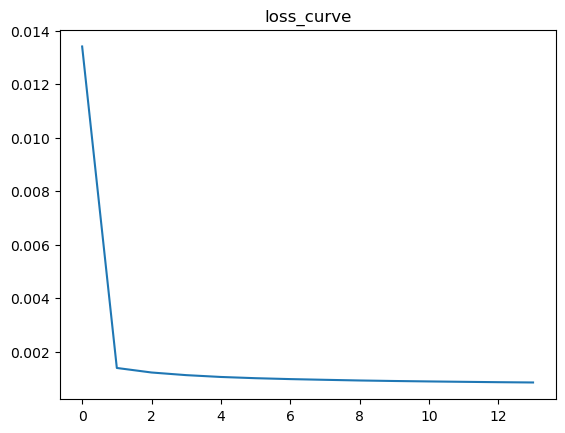

Train :  0.001529485169899293
Train :  0.9984689494057379
Test :  0.0016761166060979109
Test :  0.9983309147403394


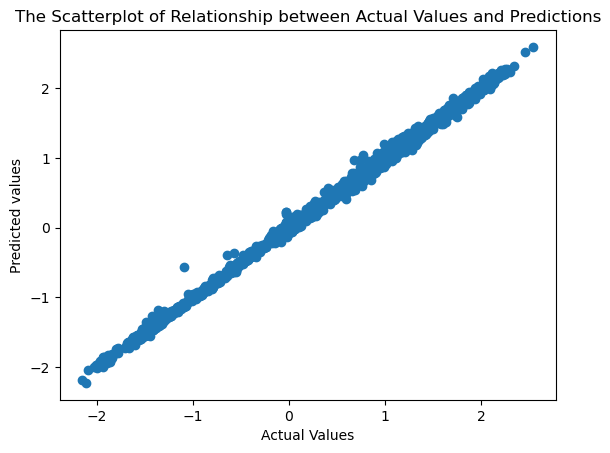

In [34]:
nnm1 = MLPRegressor(hidden_layer_sizes=10000,
                     max_iter=100,
                     solver='sgd',
                     random_state=2,
                     verbose=False,
                     tol=0.0001,
                    batch_size=15,
                     learning_rate='constant'
                    )

nnm1.fit(X_train,y_train)

plt.plot(nnm1.loss_curve_)
plt.title('loss_curve')
plt.show()

y_train_pred = nnm1.predict(X_train)
print('Train : ',mean_squared_error(y_train_pred,y_train))
print('Train : ',r2_score(y_train_pred,y_train))

y_test_pred = nnm1.predict(X_test)
print('Test : ',mean_squared_error(y_test_pred,y_test))
print('Test : ',r2_score(y_test_pred,y_test))

plt.scatter(y_test,y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.show()

### Building ANN model using Keras -Sequential :

In [27]:
nnm2 = Sequential()
nnm2.add(Dense(100,input_dim = 10,activation = 'relu'))
nnm2.add(Dense(10,activation = 'relu'))
nnm2.add(Dense(1,activation='linear'))
nnm2.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
history = nnm2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
353/353 [==============================] - 1s 1ms/step - loss: 0.0481 - mean_absolute_error: 0.1079 - val_loss: 0.0036 - val_mean_absolute_error: 0.0425
Epoch 2/50
353/353 [==============================] - 0s 1ms/step - loss: 0.0027 - mean_absolute_error: 0.0378 - val_loss: 0.0026 - val_mean_absolute_error: 0.0371
Epoch 3/50
353/353 [==============================] - 0s 1ms/step - loss: 0.0022 - mean_absolute_error: 0.0342 - val_loss: 0.0021 - val_mean_absolute_error: 0.0329
Epoch 4/50
353/353 [==============================] - 0s 1ms/step - loss: 0.0018 - mean_absolute_error: 0.0313 - val_loss: 0.0020 - val_mean_absolute_error: 0.0328
Epoch 5/50
353/353 [==============================] - 0s 1ms/step - loss: 0.0017 - mean_absolute_error: 0.0303 - val_loss: 0.0017 - val_mean_absolute_error: 0.0301
Epoch 6/50
353/353 [==============================] - 0s 1ms/step - loss: 0.0016 - mean_absolute_error: 0.0291 - val_loss: 0.0018 - val_mean_absolute_error: 0.0304
Epoch 7/50
353/3

353/353 [==============================] - 0s 1ms/step - loss: 9.3002e-04 - mean_absolute_error: 0.0220 - val_loss: 0.0014 - val_mean_absolute_error: 0.0263


In [28]:
scores = nnm2.evaluate(X_test,y_test)

118/118 [==============================] - 0s 695us/step - loss: 0.0014 - mean_absolute_error: 0.0263


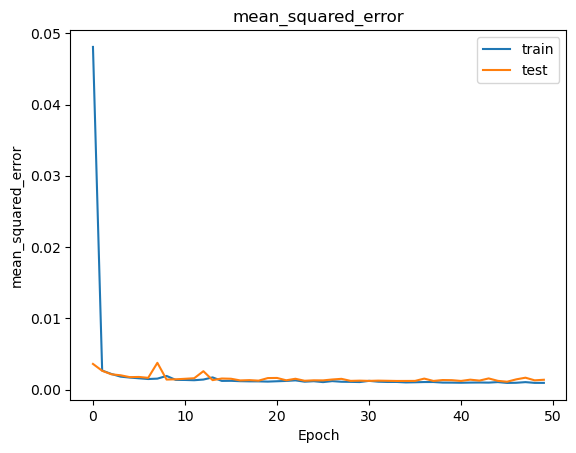

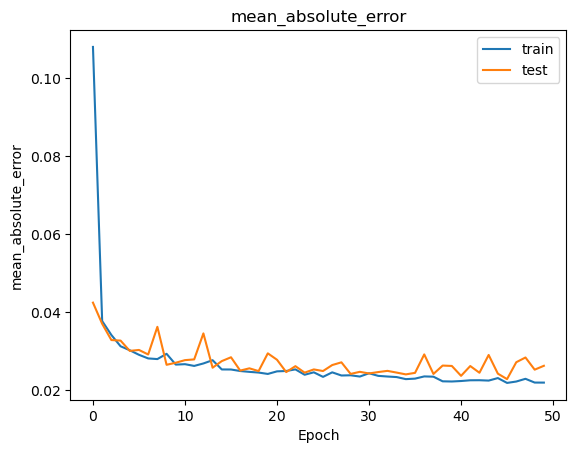

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('mean_squared_error')
plt.xlabel('Epoch')
plt.ylabel('mean_squared_error')
plt.legend(['train','test'],loc='upper right')
plt.show()
#summarize history for loss

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('mean_absolute_error')
plt.xlabel('Epoch')
plt.ylabel('mean_absolute_error')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [30]:
y_test_pred = nnm2.predict(X_test)
r2_score(y_test_pred,y_test) #This shows our model predict 99.87 % of the target correctly!

118/118 [==============================] - 0s 598us/step


0.9986622543856299

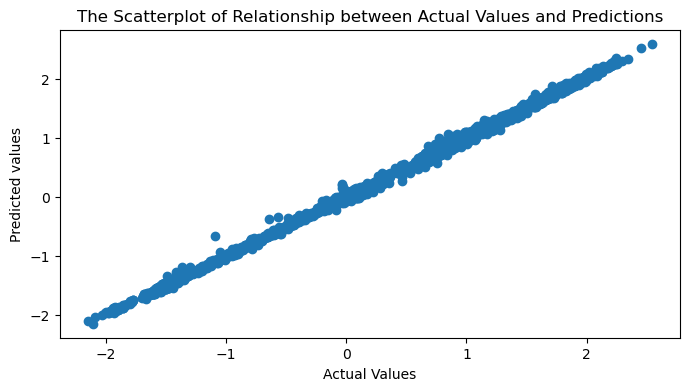

In [31]:
plt.figure(figsize=(8,4)) #Visualizing the Relationship between the Actual and Predicted Values
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(y_test,y_test_pred)
plt.show()